# CellPLATO | Cell Plasticity Analysis Tool (Trackmate version)

Step 1: Fill in the config file!

Also, make sure your data is set up in the following two tiered format:

        Master
            ├── Condition 1
            │   ├── Replicate 1
            |   |       ├── tracks.h5
            │   ├── Replicate 2
            |   |       ├── tracks.h5            
            │   └── Replicate 3
            |           └── tracks.h5            
            │  
            └── Condition 2,
                ├── Replicate 1
                |       ├── tracks.h5
                ├── Replicate 2
                |       ├── tracks.h5            
                └── Replicate 3
                        └── tracks.h5    

<div class="alert alert-block alert-danger">
Set your kernel to 'cellPLATO' before continuing
</div>

<div class="alert alert-block alert-success">
<h2>1. Start by importing packages for cellPLATO</h1>
</div>

This includes cellPLATO itself, and all of the modules you will need

* Import these packages, checking that you have them
* We're also importing a lot of the modules in cellPLATO, if this cell runs successfully, you are good to go!

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px
import re
import glob
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import requests
import zipfile
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
import requests


OVERWRITE_DATAFRAMES = True



Finished running cellPLATO initialization and loaded config.
Initializing:  EDELBLUM_1
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  Z:/mshannon/2025/August/EDELBLUM/Ananya_data_output\EDELBLUM_1\2025-10-08_15-53-35-365424\plots/
Using unique embedding per dataset shortname:  EDELBLUM_1
Exporting static Superplots
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Exporting SNS Bar plots
Dataset in current notebook:  EDELBLUM_1
Finished initializing data_processing
Finished intializing visualizations
Finished initializing cellPLATO


# Import your experiment list

Check that the list generated in the next cell contains your conditions and replicates

In [2]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)
print(cp.SAVED_DATA_PATH)

Condition                 Experiment
0    Condition_WT          R1159_WT_surfaces
1    Condition_WT          R1201_WT_surfaces
2    Condition_WT          R1482_WT_surfaces
3    Condition_WT   R1482_WT_video2_surfaces
4    Condition_ho          Q1233_ho_surfaces
5    Condition_ho   Q1233_ho_video2_surfaces
6    Condition_ho          Q1234_ho_surfaces
7    Condition_ho          Q1238_ho_surfaces
8   Condition_het         Q1231_het_surfaces
9   Condition_het         Q1232_het_surfaces
10  Condition_het  Q1232_het_video2_surfaces
11  Condition_het         Q1237_het_surfaces
12   Condition_Tg          R1200_Tg_surfaces
13   Condition_Tg          R1236_Tg_surfaces
14   Condition_Tg   R1236_Tg_video2_surfaces

Z:/mshannon/2025/August/EDELBLUM/Ananya_data_output\EDELBLUM_1\saved_data/


In [3]:
# Import the function from data_wrangling
from cellPLATO.data_processing.data_wrangling import load_and_combine_surfaces

# Run the function
comb_df = load_and_combine_surfaces(cp)

Finished initializing data_processing
The columns in the df natively are now: ['Category', 'Time', 'TrackID', 'ID', 'Position X', 'Position Y', 'Position Z', 'Speed', 'Sphericity']
The columns in the df are now: ['Category', 'frame', 'particle', 'ID', 'x_um', 'y_um', 'z_um', 'Speed', 'Sphericity', 'time']
The columns in the df natively are now: ['Category', 'Time', 'TrackID', 'ID', 'Position X', 'Position Y', 'Position Z', 'Speed', 'Sphericity']
The columns in the df are now: ['Category', 'frame', 'particle', 'ID', 'x_um', 'y_um', 'z_um', 'Speed', 'Sphericity', 'time']
The columns in the df natively are now: ['Category', 'Time', 'TrackID', 'ID', 'Position X', 'Position Y', 'Position Z', 'Speed', 'Sphericity']
The columns in the df are now: ['Category', 'frame', 'particle', 'ID', 'x_um', 'y_um', 'z_um', 'Speed', 'Sphericity', 'time']
The columns in the df natively are now: ['Category', 'Time', 'TrackID', 'ID', 'Position X', 'Position Y', 'Position Z', 'Speed', 'Sphericity']
The columns 

In [4]:
# Import the function from data_wrangling
from cellPLATO.data_processing.data_wrangling import load_and_combine_tracks

# Run the function
tavg_df = load_and_combine_tracks(cp)

Category
Collection
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Category
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Category
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Category
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Category
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Category
ID
Track Position X Mean
Track Position Y Mean
Track Position Z Mean
Track Position X Start
Track Position Y Start
Track Position Z Start
Track Speed Mean
Categ

### Make a timeplot of any factor

In [5]:
# This is a timeplot of the chosen factor (mean, 95% CI) for each condition
chosen_factor = 'Sphericity'
f=cp.multi_condition_timeplot(comb_df, factor = chosen_factor)
f.show()

In [6]:
# This is a timeplot of the chosen factor (mean, 95% CI) for each condition
chosen_factor = 'Sphericity'

cp.timeplots_of_differences(comb_df,factor=chosen_factor)

### Make a plot of any factor

<Figure size 432x288 with 0 Axes>

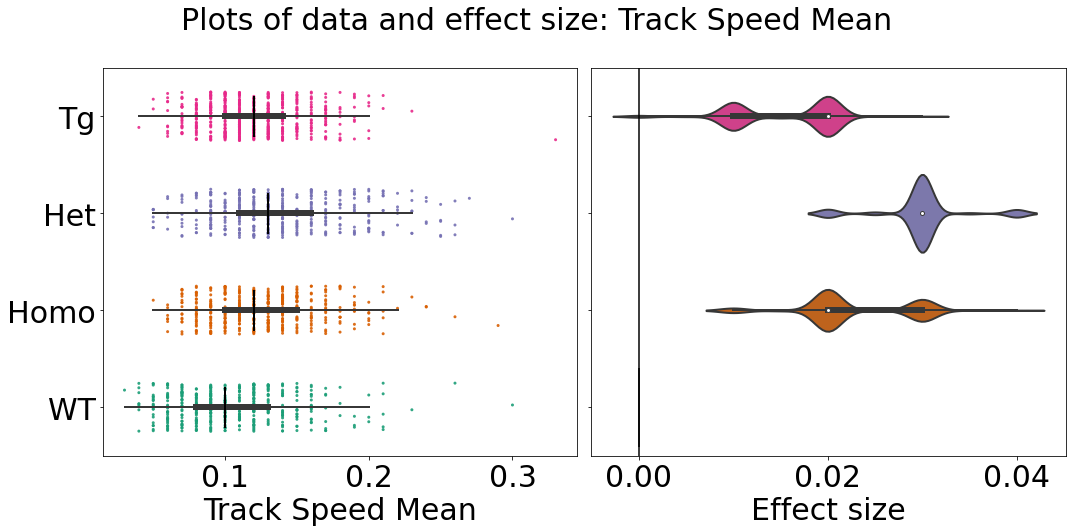

In [7]:
f=cp.plots_of_differences_sns(tavg_df,factor='Track_Speed_Mean')
f.show()

OK - this data had two problems as input, which had to be solved before continuing: 
1. Some tracks had duplicate frames as input, so a unique track (based on its track id) would appear in the same frame twice. 
2. Some tracks had missing frames (due to the type of tracking used)

So solve both issues, I used interpolation.

In [8]:
# Deduplicate frames and interpolate
comb_df_clean = cp.deduplicate_frames_and_interpolate(comb_df, verbose=True)

🧹 Removing duplicate frames and interpolating...
   Track 0_2_1000010202: Found 19 duplicate frame values
      Duplicate frames: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
      Removed 38 duplicate rows
      Interpolated 19 frames
   Track 0_2_1000010252: Found 1 duplicate frame values
      Duplicate frames: [16]
      Removed 2 duplicate rows
      Interpolated 1 frames
   Track 0_2_1000010824: Found 8 duplicate frame values
      Duplicate frames: [17, 20, 21, 22, 23, 24, 25, 26]
      Removed 16 duplicate rows
      Interpolated 8 frames
   Track 0_2_1000011054: Found 2 duplicate frame values
      Duplicate frames: [30, 31]
      Removed 4 duplicate rows
      Interpolated 2 frames
   Track 0_2_1000011477: Found 19 duplicate frame values
      Duplicate frames: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 70, 71, 72, 73]
      Removed 41 duplicate rows
      Interpolated 19 frames
   Track 0_2_1000011537: Found 29 duplicate frame val

In [9]:
### Fix gaps with chosen method
comb_df_final = cp.fix_track_gaps(
    comb_df_clean, 
    method='fill',  # 'fill', 'split', or 'auto'
    verbose=True
)

=== TRACK GAP FIXING ===
🔍 Using 'uniq_id' column to identify tracks

📊 Gap Analysis:
   Tracks with gaps: 1032/1640 (62.9%)

🔧 Applying method: 'fill'
   📝 This will interpolate missing frames to create continuous tracks
   ✅ Preserves original track structure
   ⚠️  May introduce interpolation artifacts
🔧 Filling frame gaps by interpolation...


100%|██████████| 27/27 [00:00<00:00, 364.86it/s]

   ✅ Filled gaps in 1032 tracks
   ✅ Added 4130 interpolated frames
   ✅ Result: 72411 → 76541 frames

✅ Verification:
   Sample track has gaps: False
   Sample frame sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]...

🧪 Quick test: Running migration calculations...
Processing migration calculations of pooled data
Processing migration_calcs() for condition:  Condition_het
Processing migration_calcs() for experiment:  Q1231_het
   Test NaN rate: 18.8% (was ~35%)
   ⚠️  Some improvement, but gaps remain

🎯 Result: 76541 frames ready for analysis


In [10]:
comb_df = comb_df_final
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)

## Time window decision
Before proceeding, let's make sure we use a suitable time window for this data out what time window to use for the cellPLATO migration features

In [11]:
# Check your current time window settings
analysis = cp.analyze_time_window_settings(comb_df)

=== TIME WINDOW ANALYSIS ===

⚙️  Current Settings:
   Window: 5 minutes (8 frames)
   Sampling: 0.67 minutes/frame

📊 Track Length Analysis:
   Total tracks: 1640
   Track length range: 2 to 211 frames
   Mean track length: 46.7 frames
   Median track length: 33.0 frames

⚠️  Current Window Impact:
   Data loss due to windowing: 15.0%
   Total frames: 76541
   Frames with migration data: 65074
   Tracks with NO migration data: 4 (0.2%)

💡 Recommendations:
   Conservative: 5.3 min (8 frames)
     → 15.0% data loss - Minimal data loss, smaller temporal context
   Balanced: 6.7 min (10 frames)
     → 19.3% data loss - Good balance of data retention and temporal context
   Aggressive: 10.7 min (16 frames)
     → 32.0% data loss - More temporal context, higher data loss

🎯 Current setting status: ✅ Good (15.0% data loss)


In [12]:
SAMPLING_INTERVAL = 40/60
MigrationTimeWindow_minutes = 5 # Here, set the length of the time window in minutes (reduced from 43.5)
MIG_T_WIND = round(MigrationTimeWindow_minutes / SAMPLING_INTERVAL)

Now this calculates the delta x,y,z and direction in radians

In [13]:
# Calculate delta x, y, z, and directionality in radians using time windowing strategy
from data_processing.migration_calculations import calculate_and_add_delta_factors

# Add the new delta factors to the dataframe
print("\n" + "="*50)
print("Adding delta factors to dataframe...")
comb_df = calculate_and_add_delta_factors(comb_df)

# Check the new columns were added
print(f"\nDataframe shape after adding delta factors: {comb_df.shape}")

windowed_columns = ['delta_x', 'delta_y', 'delta_z', 'directionality_radians']
instant_columns = ['instant_delta_x', 'instant_delta_y', 'instant_delta_z', 'instant_directionality_radians']
all_new_columns = windowed_columns + instant_columns




 54%|█████▎    | 84/157 [00:00<00:00, 839.99it/s]


Adding delta factors to dataframe...
Calculating delta x, delta y, delta z, and directionality in radians...
Using time window of 8 frames
Input DataFrame shape: (76541, 23)
Available columns: ['frame', 'Category', 'particle', 'ID', 'x_um', 'y_um', 'z_um', 'Speed', 'Sphericity', 'time', 'x_pix', 'y_pix', 'z_pix', 'Condition', 'Experiment', 'Replicate_ID', 'file_id', 'included', 'Condition_shortlabel', 'uniq_id', 'ntpts', 'Collection', 'repID_int']
Processing delta calculations of pooled data
Processing delta_calcs() for condition:  Condition_het
Processing delta_calcs() for experiment:  Q1231_het


  0%|          | 0/108 [00:00<?, ?it/s]

Processing delta_calcs() for experiment:  Q1232_het
Processing delta_calcs() for experiment:  Q1237_het


 50%|████▉     | 102/206 [00:00<00:00, 1020.00it/s]

Processing delta_calcs() for condition:  Condition_ho
Processing delta_calcs() for experiment:  Q1233_ho


  0%|          | 0/110 [00:00<?, ?it/s]

Processing delta_calcs() for experiment:  Q1234_ho
Processing delta_calcs() for experiment:  Q1238_ho


  0%|          | 0/230 [00:00<?, ?it/s]

Processing delta_calcs() for condition:  Condition_Tg
Processing delta_calcs() for experiment:  R1200_Tg
Processing delta_calcs() for experiment:  R1236_Tg


  0%|          | 0/120 [00:00<?, ?it/s]

Processing delta_calcs() for condition:  Condition_WT
Processing delta_calcs() for experiment:  R1159_WT
Processing delta_calcs() for experiment:  R1201_WT


 42%|████▏     | 90/214 [00:00<00:00, 882.36it/s]

Processing delta_calcs() for experiment:  R1482_WT


100%|██████████| 214/214 [00:00<00:00, 930.44it/s]


Delta calculations completed!
  delta_x: 65074/76541 non-null values
    Range: -1189.680 to 1324.490
  delta_y: 65074/76541 non-null values
    Range: -473.480 to 281.370
  delta_z: 65074/76541 non-null values
    Range: -9.735 to 10.570
  directionality_radians: 65074/76541 non-null values
    Range: -3.140 to 3.142
  instant_delta_x: 65074/76541 non-null values
    Range: -396.223 to 441.273
  instant_delta_y: 65074/76541 non-null values
    Range: -152.457 to 92.370
  instant_delta_z: 65074/76541 non-null values
    Range: -6.590 to 8.850
  instant_directionality_radians: 65074/76541 non-null values
    Range: -3.138 to 3.142
Added windowed columns: 'delta_x', 'delta_y', 'delta_z', 'directionality_radians'
Added instant columns: 'instant_delta_x', 'instant_delta_y', 'instant_delta_z', 'instant_directionality_radians'

Dataframe shape after adding delta factors: (76541, 31)


### Now calculate full migration features

This adds all the migration metrics:
- `euclidean_dist` - Straight-line distance from start
- `cumulative_length` - Total path length traveled  
- `speed` - Migration speed
- `MSD` - Mean squared displacement
- `directedness` - Ratio of euclidean distance to cumulative length (persistence)
- `turn_angle` - Angular change in direction
- `arrest_coefficient` - Time spent arrested vs moving
- `orientedness`, `endpoint_dir_ratio`, `dir_autocorr`, `outreach_ratio`, `max_dist`, `glob_turn_deg`


In [14]:
# Calculate full migration features
from cellPLATO.data_processing.migration_calculations import migration_calcs

print("\n" + "="*50)
print("Calculating migration features...")
print(f"Input shape: {comb_df.shape}")

# Run migration calculations
comb_df = migration_calcs(comb_df)

print(f"Output shape: {comb_df.shape}")
print("\n✅ Migration features added to dataframe!")

# Show what was added
migration_features = ['euclidean_dist', 'segment_length', 'cumulative_length', 'speed',
                      'orientedness', 'directedness', 'turn_angle', 'endpoint_dir_ratio',
                      'dir_autocorr', 'outreach_ratio', 'MSD', 'max_dist', 
                      'glob_turn_deg', 'arrest_coefficient']

print("\nMigration features in dataframe:")
for feat in migration_features:
    if feat in comb_df.columns:
        non_null = comb_df[feat].notna().sum()
        total = len(comb_df)
        pct = 100 * non_null / total
        print(f"  ✓ {feat}: {non_null:,}/{total:,} ({pct:.1f}%) non-null")
        if non_null > 0:
            print(f"    Range: [{comb_df[feat].min():.3f}, {comb_df[feat].max():.3f}]")
    else:
        print(f"  ✗ {feat}: NOT FOUND")


 24%|██▍       | 38/157 [00:00<00:00, 376.24it/s]


Calculating migration features...
Input shape: (76541, 31)
Processing migration calculations of pooled data
Processing migration_calcs() for condition:  Condition_het
Processing migration_calcs() for experiment:  Q1231_het


 56%|█████▋    | 84/149 [00:00<00:00, 428.54it/s]

Processing migration_calcs() for experiment:  Q1232_het


 45%|████▌     | 49/108 [00:00<00:00, 480.39it/s]

Processing migration_calcs() for experiment:  Q1237_het


 19%|█▉        | 39/206 [00:00<00:00, 382.35it/s]

Processing migration_calcs() for condition:  Condition_ho
Processing migration_calcs() for experiment:  Q1233_ho


 20%|█▉        | 21/106 [00:00<00:00, 200.01it/s]

Processing migration_calcs() for experiment:  Q1234_ho


 15%|█▍        | 16/110 [00:00<00:00, 158.42it/s]

Processing migration_calcs() for experiment:  Q1238_ho


 16%|█▌        | 22/139 [00:00<00:00, 196.43it/s]

Processing migration_calcs() for condition:  Condition_Tg
Processing migration_calcs() for experiment:  R1200_Tg


 13%|█▎        | 31/230 [00:00<00:00, 306.93it/s]

Processing migration_calcs() for experiment:  R1236_Tg


 19%|█▉        | 19/101 [00:00<00:00, 184.47it/s]

Processing migration_calcs() for condition:  Condition_WT
Processing migration_calcs() for experiment:  R1159_WT


 12%|█▎        | 15/120 [00:00<00:00, 147.77it/s]

Processing migration_calcs() for experiment:  R1201_WT


  8%|▊         | 18/214 [00:00<00:01, 178.22it/s]

Processing migration_calcs() for experiment:  R1482_WT


100%|██████████| 214/214 [00:00<00:00, 302.90it/s]

Output shape: (76541, 45)

✅ Migration features added to dataframe!

Migration features in dataframe:
  ✓ euclidean_dist: 65,074/76,541 (85.0%) non-null
    Range: [0.000, 1352.980]
  ✓ segment_length: 65,074/76,541 (85.0%) non-null
    Range: [0.000, 450.837]
  ✓ cumulative_length: 65,074/76,541 (85.0%) non-null
    Range: [0.000, 2433.129]
  ✓ speed: 65,074/76,541 (85.0%) non-null
    Range: [0.000, 676.256]
  ✓ orientedness: 65,074/76,541 (85.0%) non-null
    Range: [0.999, 1.000]
  ✓ directedness: 64,994/76,541 (84.9%) non-null
    Range: [-1.000, 1.000]
  ✓ turn_angle: 64,982/76,541 (84.9%) non-null
    Range: [-90.000, 90.000]
  ✓ endpoint_dir_ratio: 65,013/76,541 (84.9%) non-null
    Range: [0.000, 1.000]
  ✓ dir_autocorr: 64,969/76,541 (84.9%) non-null
    Range: [-1.000, 1.000]
  ✓ outreach_ratio: 65,013/76,541 (84.9%) non-null
    Range: [0.143, 1.000]
  ✓ MSD: 65,074/76,541 (85.0%) non-null
    Range: [0.000, 112712.054]
  ✓ max_dist: 65,074/76,541 (85.0%) non-null
    Range

Then this checks a single track - there will be nans at the start and end due to time windows. Set as such to make sure that values are only placed there when calculated from a FULL time window.

In [15]:
# extract a single track from comb_df, picking a random uniq_id

import random

unique_uniq_ids = comb_df['uniq_id'].dropna().unique()
sample_uniq_id = random.choice(unique_uniq_ids)
single_track = comb_df[comb_df['uniq_id'] == sample_uniq_id].copy()

print(f"Extracted track for uniq_id: {sample_uniq_id}")
print(f"Track length: {len(single_track)} frames")
print(f"Frame range: {single_track['frame'].min()} to {single_track['frame'].max()}")
print(f"Condition: {single_track['Condition'].iloc[0] if 'Condition' in single_track.columns else 'Unknown'}")
print(f"Replicate: {single_track['Replicate_ID'].iloc[0] if 'Replicate_ID' in single_track.columns else 'Unknown'}")

# Print frame and delta_x for each row
print("\nFrame and delta_x for each row:")
for idx, row in single_track.iterrows():
    frame = row['frame']
    delta_x = row['delta_x'] if 'delta_x' in row else 'N/A'
    print(f"Frame {frame}: delta_x = {delta_x}")

Extracted track for uniq_id: 2_2_1000003593
Track length: 29 frames
Frame range: 43 to 71
Condition: Condition_het
Replicate: Q1237_het

Frame and delta_x for each row:
Frame 43: delta_x = nan
Frame 44: delta_x = nan
Frame 45: delta_x = nan
Frame 46: delta_x = nan
Frame 47: delta_x = -0.12000000000034561
Frame 48: delta_x = -1.3500000000003638
Frame 49: delta_x = -0.875
Frame 50: delta_x = -3.200000000000273
Frame 51: delta_x = -5.489999999999782
Frame 52: delta_x = -4.724999999999909
Frame 53: delta_x = -4.690000000000055
Frame 54: delta_x = -2.7099999999995816
Frame 55: delta_x = 0.4149999999999636
Frame 56: delta_x = 0.7049999999999272
Frame 57: delta_x = 0.6700000000000728
Frame 58: delta_x = 0.8699999999998909
Frame 59: delta_x = 0.8249999999998181
Frame 60: delta_x = 0.5199999999999818
Frame 61: delta_x = 1.180000000000291
Frame 62: delta_x = 0.15000000000009095
Frame 63: delta_x = -1.3999999999996362
Frame 64: delta_x = -2.1099999999996726
Frame 65: delta_x = -2.3900000000003274

In [16]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)

As you just saved the dfs, if you want to restart the kernel and start from here, then you can do so by running from below (reloads the dataframes)

In [17]:
# load the tavg_df from csv
comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')

### Define cellPLATO migration factors
here we are using the deltas and your precalculated speed and sphericity

In [18]:
comb_df.columns

Index(['frame', 'Category', 'particle', 'ID', 'x_um', 'y_um', 'z_um', 'Speed',
       'Sphericity', 'time', 'x_pix', 'y_pix', 'z_pix', 'Condition',
       'Experiment', 'Replicate_ID', 'file_id', 'included',
       'Condition_shortlabel', 'uniq_id', 'ntpts', 'Collection', 'repID_int',
       'delta_x', 'delta_y', 'delta_z', 'directionality_radians',
       'instant_delta_x', 'instant_delta_y', 'instant_delta_z',
       'instant_directionality_radians', 'euclidean_dist', 'segment_length',
       'cumulative_length', 'speed', 'orientedness', 'directedness',
       'turn_angle', 'endpoint_dir_ratio', 'dir_autocorr', 'outreach_ratio',
       'MSD', 'max_dist', 'glob_turn_deg', 'arrest_coefficient'],
      dtype='object')

In [19]:
DR_FACTORS = ['euclidean_dist', 'segment_length',
       'cumulative_length', 'speed', 'orientedness', 'directedness',
       'turn_angle', 'endpoint_dir_ratio', 'dir_autocorr', 'outreach_ratio',
       'MSD', 'max_dist', 'glob_turn_deg', 'arrest_coefficient']

### Optional: do filtering on the data (on top of what has been stated in the config file)

In [20]:
# # User-defined filters in dict {factor:(min, max)}

# data_filters = {
# #   "Speed": (10, 100),
#   "Sphericity": (1, 10000),
# #    "frame": (0, 450), # Warning: range will change if self-normalized
#   # "ntpts": (2,1800)
# }

# # Returns a filtered dataframe, while also adding included column to comb_df
# filt_df, filt_counts = cp.apply_filters(comb_df,how='any', filter_dict=data_filters)

# fig = cp.visualize_filtering(filt_df, filt_counts)


# Plot all metrics

This cell makes comparative plots for every single metric and saves them in your output folder

* Plots of difference
* Timeplots of difference
* Marginal xy plots
* Simple bar plots
* Superplots - useful for comparing between replicates

<div class="alert alert-block alert-danger">
Check that you are happy with your extra filtering before continuing
Run the next cell on the filtered dataframe or the unfiltered dataframe once you are ready
</div>

In [21]:
# Outputs plots of all metrics for all factors
# cp.comparative_visualization_pipeline(comb_df, num_factors=DR_FACTORS) 

<div class="alert alert-block alert-success">
<h2>3. Definition of single timepoint behavioural clusters using UMAP and HDBSCAN</h1>
</div>

Here, you should pay attention to which factors you choose for dimensionality reduction. The following section provides some ways to aid that decision, to be combined with biological knowledge as to which factors are important

### Perform correlation analysis to understand which factors correlate to one another

This helps to avoid picking factors that are very similar to one another (here there are much more limited factors so just useful for interests sake)

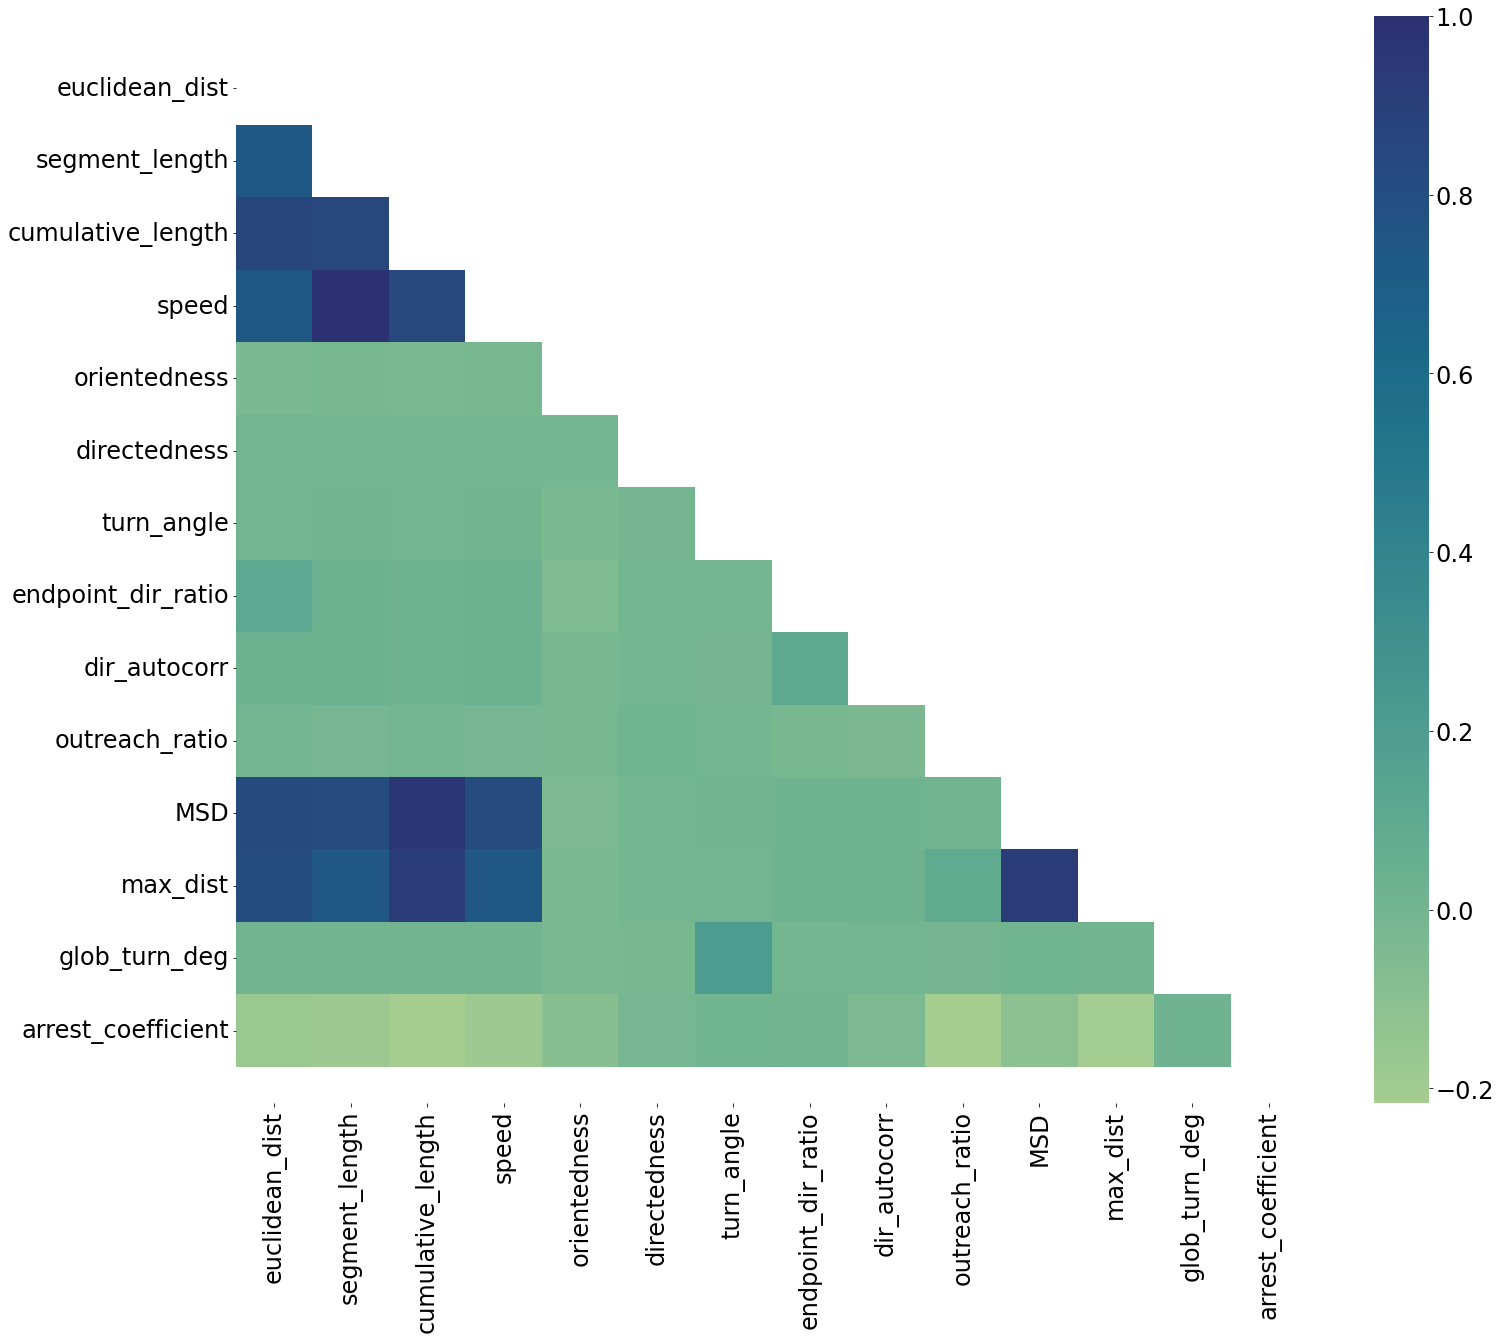

In [22]:
df_in = comb_df
cp.correlation_matrix_heatmap(df_in, factors = DR_FACTORS) 

This next cell gives some quick advice about centre scaling and shows the distribution of the data

Then, you can apply the correct scaling to the metrics, and measure their variance contribution. Scikitlearn uses:

Variance = Σ(xᵢ - μ)² / (n - 1)

For this data, there are few factors, but you might want this if you decide on using more

In [23]:
# # Then apply variance threshold with optimized scaling
# chosen_dr_factors = cp.variance_threshold(
#     df_in=comb_df,
#     threshold_value=0.001, 
#     dr_factors=DR_FACTORS,
#     scaling_method='choice',
#     factors_to_transform=factor_analysis['suggested_to_transform'],
#     factors_not_to_transform=factor_analysis['suggested_not_to_transform']
# )

In [24]:
# factors_to_transform=factor_analysis['suggested_to_transform']
# factors_not_to_transform=factor_analysis['suggested_not_to_transform']

## NOTE: there are other scaling options available! This combo of log2 and minmax was what I used in the paper. Others include standardscaler, the most popular. Search 'center scaling' to find out more about them.

### Handling NaNs. 

We already fixed the nans in the data, but good to check whether there are remaining problems

In [25]:
# # Analyze individual tracks to see where NaNs come from
# track_analysis = cp.analyze_individual_tracks_for_nans(comb_df, track_id_col='uniq_id', n_tracks_to_analyze=5)

In [26]:
# # Investigate the NaN problem
# investigation_results = cp.investigate_nan_causes(comb_df, verbose=True)

In [27]:
# Pick a random particle based on uniq_id and look at its track in detail
random_uniq_id = comb_df['uniq_id'].sample(1).iloc[0]
single_track = comb_df[comb_df['uniq_id'] == random_uniq_id].sort_values('frame')
print("Random uniq_id:", random_uniq_id)
print("Track frames:", single_track['frame'].values[:20])
print("Track length:", len(single_track))
print("Frame range:", single_track['frame'].min(), "to", single_track['frame'].max())
print("Has gaps:", len(set(range(int(single_track['frame'].min()), int(single_track['frame'].max()) + 1))) != len(single_track))

Random uniq_id: 10_0_1000002041
Track frames: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58]
Track length: 37
Frame range: 39 to 75
Has gaps: False


### Once there are no gaps in the data due to missed detections, there will still be a few gaps at the start and end of tracks due to the use of time windows.
This is a trade off for using time windows, which gives the data much less bias, but loses a bit of data (3 frames at the start and end, in this case).
You can either drop those rows entirely or remove the cellPLATO migration factors, calculated over time windows.

In [28]:
# Just analyze without changing anything
df_clean, factors_clean, report = cp.handle_nan_for_dr(
    comb_df, 
    DR_FACTORS, 
    method='drop_rows'
)

# auto': Drop factors with >nan_threshold% NaN, then drop remaining NaN rows
# 'drop_rows': Drop all rows containing any NaN values in DR factors
# 'drop_factors': Drop all factors containing any NaN values
# 'analyze_only': Just analyze and report, don't modify data nan_threshold : float For 'auto' method: percentage threshold for dropping factors (default 30%) verbose : bool Print detailed information



=== NaN HANDLING FOR DIMENSIONALITY REDUCTION (drop_rows) ===
Original data shape: (76541, 45)
Original DR factors: 14

Found 14 factors with NaN values:
  ℹ️ euclidean_dist: 11467/76541 (15.0%) are NaN
  ℹ️ segment_length: 11467/76541 (15.0%) are NaN
  ℹ️ cumulative_length: 11467/76541 (15.0%) are NaN
  ℹ️ speed: 11467/76541 (15.0%) are NaN
  ℹ️ orientedness: 11467/76541 (15.0%) are NaN
  ℹ️ directedness: 11547/76541 (15.1%) are NaN
  ℹ️ turn_angle: 11559/76541 (15.1%) are NaN
  ℹ️ endpoint_dir_ratio: 11528/76541 (15.1%) are NaN
  ℹ️ dir_autocorr: 11572/76541 (15.1%) are NaN
  ℹ️ outreach_ratio: 11528/76541 (15.1%) are NaN
  ℹ️ MSD: 11467/76541 (15.0%) are NaN
  ℹ️ max_dist: 11467/76541 (15.0%) are NaN
  ℹ️ glob_turn_deg: 11547/76541 (15.1%) are NaN
  ℹ️ arrest_coefficient: 11467/76541 (15.0%) are NaN
Dropped 11572 rows with NaN values

=== SUMMARY ===
Data shape: (76541, 45) → (64969, 45)
DR factors: 14 → 14
=== END NaN HANDLING ===



In [29]:
# Get a random unique ID and extract a single track
random_uniq_id = df_clean['uniq_id'].sample(1).iloc[0]
single_track_df = df_clean[df_clean['uniq_id'] == random_uniq_id].copy()

print(f"Selected random uniq_id: {random_uniq_id}")
print(f"Track contains {len(single_track_df)} time points")
print(f"Condition: {single_track_df['Condition'].iloc[0]}")
print(f"Experiment: {single_track_df['Experiment'].iloc[0]}")


Selected random uniq_id: 7_3_1000021144
Track contains 60 time points
Condition: Condition_Tg
Experiment: R1236_Tg


## Perform UMAP and cluster analysis

Well separated clusters depend mostly on 1. the input factors and 2. the umap_nn setting

You can change both, depending on the nature of your data, in order to achieve a reasonable level of separation of clusters

In [30]:
factors_clean

['euclidean_dist',
 'segment_length',
 'cumulative_length',
 'speed',
 'orientedness',
 'directedness',
 'turn_angle',
 'endpoint_dir_ratio',
 'dir_autocorr',
 'outreach_ratio',
 'MSD',
 'max_dist',
 'glob_turn_deg',
 'arrest_coefficient']

In [31]:
chosenfactors = factors_clean
chosenfactors = chosenfactors + ['Sphericity']


In [32]:
# Configure shared scaling
SCALING_METHOD = 'choice'  # e.g. 'minmax', 'standard', 'log2minmax', 'choice', 'robust', 'normalize', 'quantile', 'maxabs', 'yeo-johnson', 'box-cox'

# Optional override lists for 'choice' scaling
# factors_to_transform = None  # e.g. ['area','speed']
# factors_not_to_transform = None  # e.g. ['eccentricity','directedness','turn_angle']

# UMAP / tSNE params
umap_nn = 30#15
min_dist = 0.0
n_components = 3
tsne_perp = 150



In [33]:
# # Visualize the effect of scaling on the chosen factors
# import matplotlib.pyplot as plt
# import numpy as np
# from cellPLATO.data_processing.scaling import scale_features

# # Get unscaled data
# unscaled_data = df_clean[chosenfactors].copy()

# # Apply the chosen scaling method
# scaled_array, used_cols = scale_features(
#     df_clean,
#     factors=chosenfactors,
#     method=SCALING_METHOD,
#     average_time_windows=False,
#     factors_to_transform=factors_to_transform,
#     factors_not_to_transform=factors_not_to_transform,
#     verbose=False
# )
# # Convert scaled array back to DataFrame for easier handling
# scaled_data = pd.DataFrame(scaled_array, columns=used_cols, index=df_clean.index)

# # Create comparison histograms
# n_factors = len(chosenfactors)
# fig, axes = plt.subplots(n_factors, 2, figsize=(12, 3*n_factors))

# if n_factors == 1:
#     axes = axes.reshape(1, -1)

# for i, factor in enumerate(chosenfactors):
#     # Unscaled histogram (left column)
#     ax_unscaled = axes[i, 0]
#     unscaled_vals = unscaled_data[factor].dropna()
#     ax_unscaled.hist(unscaled_vals, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
#     ax_unscaled.set_title(f'{factor} - UNSCALED', fontsize=12, fontweight='bold')
#     ax_unscaled.set_xlabel('Value')
#     ax_unscaled.set_ylabel('Frequency')
#     ax_unscaled.grid(True, alpha=0.3)
    
#     # Add statistics
#     stats_text = f'Mean: {unscaled_vals.mean():.3f}\nStd: {unscaled_vals.std():.3f}\nMin: {unscaled_vals.min():.3f}\nMax: {unscaled_vals.max():.3f}'
#     ax_unscaled.text(0.98, 0.97, stats_text, transform=ax_unscaled.transAxes,
#                      verticalalignment='top', horizontalalignment='right',
#                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#                      fontsize=9)
    
#     # Scaled histogram (right column)
#     ax_scaled = axes[i, 1]
#     scaled_vals = scaled_data[factor].dropna()
#     ax_scaled.hist(scaled_vals, bins=50, alpha=0.7, color='coral', edgecolor='black')
#     ax_scaled.set_title(f'{factor} - {SCALING_METHOD.upper()} SCALED', fontsize=12, fontweight='bold')
#     ax_scaled.set_xlabel('Value')
#     ax_scaled.set_ylabel('Frequency')
#     ax_scaled.grid(True, alpha=0.3)
    
#     # Add statistics
#     stats_text = f'Mean: {scaled_vals.mean():.3f}\nStd: {scaled_vals.std():.3f}\nMin: {scaled_vals.min():.3f}\nMax: {scaled_vals.max():.3f}'
#     ax_scaled.text(0.98, 0.97, stats_text, transform=ax_scaled.transAxes,
#                    verticalalignment='top', horizontalalignment='right',
#                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
#                    fontsize=9)

# plt.tight_layout()
# plt.suptitle(f'Distribution Comparison: Unscaled vs {SCALING_METHOD.upper()} Scaled', 
#              fontsize=14, fontweight='bold', y=1.002)
# plt.show()

# print(f"\n{'='*60}")
# print(f"Scaling Method: {SCALING_METHOD}")
# print(f"Number of factors: {n_factors}")
# print(f"Number of data points: {len(df_clean)}")
# print(f"{'='*60}")


Because ['directionality_radians','directedness', 'glob_turn_deg', 'turn_angle'] have flat or U shaped distributions (even after centre scaling, they will homogenize everything during clustering and mask useful insights, so they are removed for this data.

In [34]:
# make a list of factors to remove
factorstoremove = ['directionality_radians','directedness', 'glob_turn_deg', 'turn_angle']
# The '-' operator does not work for lists in Python. Use a list comprehension instead:
chosenfactors = [f for f in chosenfactors if f not in factorstoremove]
print(chosenfactors)

['euclidean_dist', 'segment_length', 'cumulative_length', 'speed', 'orientedness', 'endpoint_dir_ratio', 'dir_autocorr', 'outreach_ratio', 'MSD', 'max_dist', 'arrest_coefficient', 'Sphericity']


=== FACTOR ANALYSIS FOR 'CHOICE' SCALING ===

euclidean_dist: LOG-TRANSFORM
  Range: 0.000 to 1352.980
  Reasons: high dynamic range or skewed distribution

segment_length: LOG-TRANSFORM
  Range: 0.000 to 450.837
  Reasons: high dynamic range or skewed distribution

cumulative_length: LOG-TRANSFORM
  Range: 0.000 to 2433.129
  Reasons: high dynamic range or skewed distribution

speed: LOG-TRANSFORM
  Range: 0.000 to 676.256
  Reasons: high dynamic range or skewed distribution

orientedness: MINMAX ONLY
  Range: 0.999 to 1.000
  Reasons: appears to be ratio/proportion (0-1 range)

endpoint_dir_ratio: MINMAX ONLY
  Range: 0.000 to 1.000
  Reasons: appears to be ratio/proportion (0-1 range)

dir_autocorr: MINMAX ONLY
  Range: -1.000 to 1.000
  Reasons: appears bounded and well-scaled

outreach_ratio: MINMAX ONLY
  Range: 0.143 to 1.000
  Reasons: appears to be ratio/proportion (0-1 range)

MSD: LOG-TRANSFORM
  Range: 0.000 to 112712.054
  Reasons: high dynamic range or skewed distribution

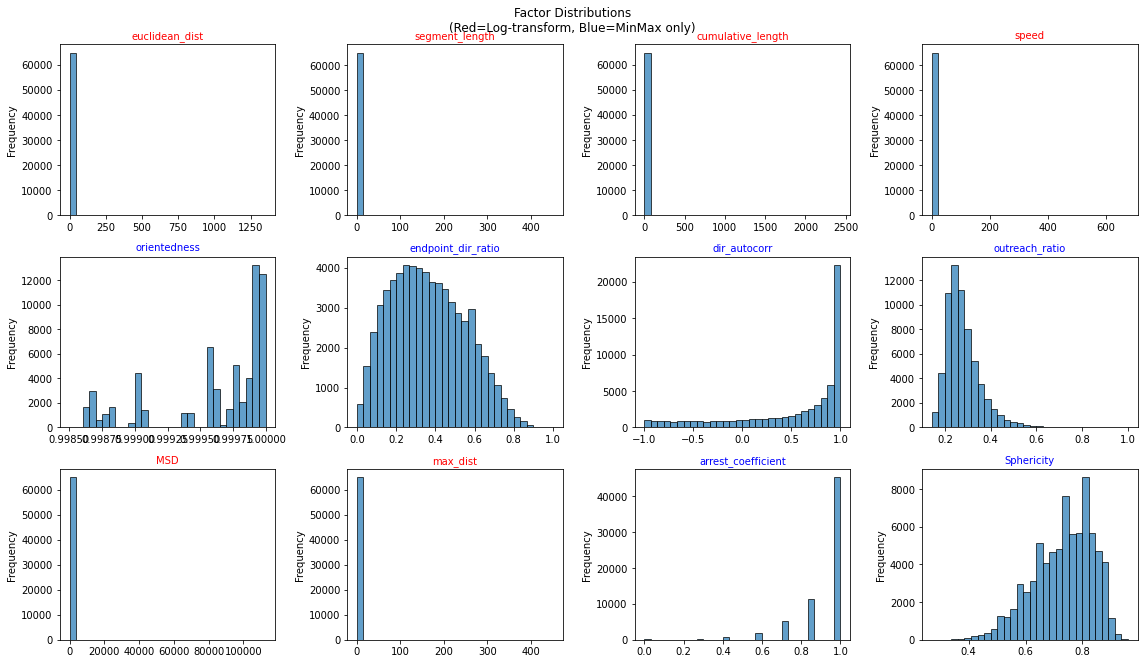

In [35]:
# First analyze your factors to optimize scaling
factor_analysis = cp.analyze_factors_for_choice_scaling(
    df=comb_df, 
    factors_list=chosenfactors,
    show_distributions=True
)



In [36]:
factorstotransform = factor_analysis['suggested_to_transform']
factorstonottransform = factor_analysis['suggested_not_to_transform']

In [37]:
factorstotransform

['euclidean_dist',
 'segment_length',
 'cumulative_length',
 'speed',
 'MSD',
 'max_dist']

max: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
min: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
UMAP output data contains 0 negative infinite values
Embedding shape:  (64969, 3)


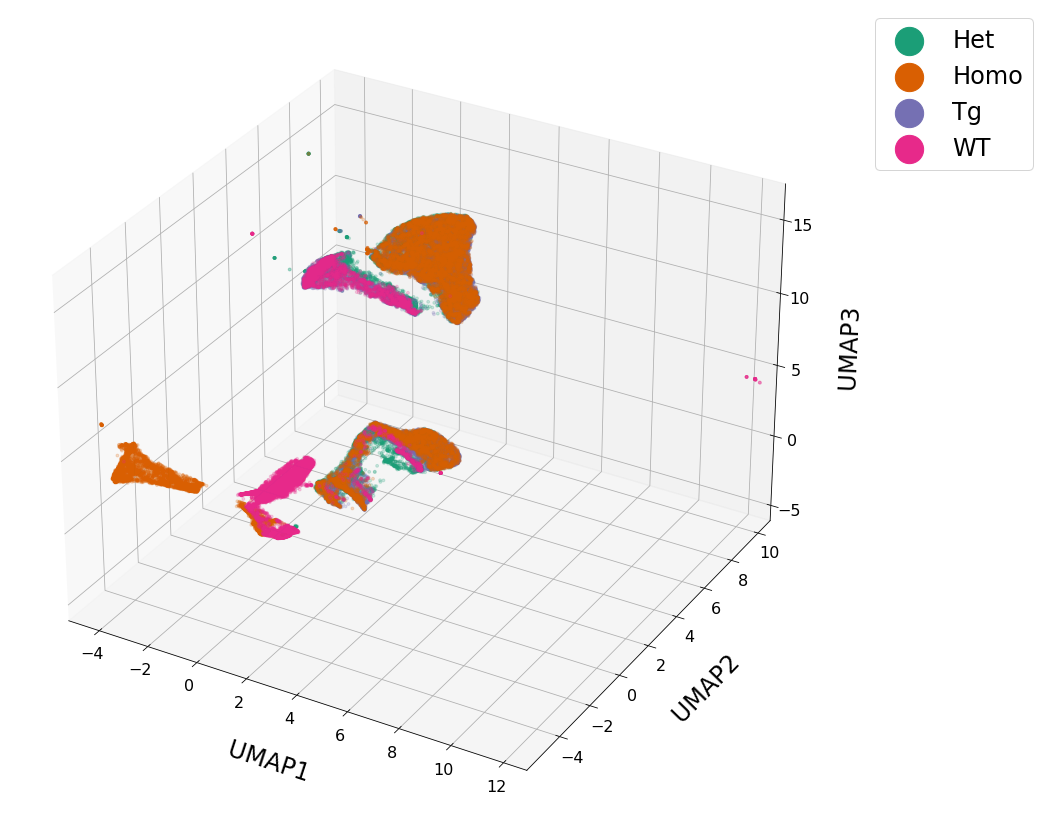

<Axes3DSubplot:xlabel='\n UMAP1', ylabel='\n UMAP2'>

In [38]:
# Run DR pipeline v2 with shared scaling

umap_nn = 30

dr_df = cp.dr_pipeline_multiUMAPandTSNE_v2(
    df_clean,
    dr_factors=chosenfactors,
    tsne_perp=tsne_perp,
    umap_nn=umap_nn,
    min_dist=min_dist,
    n_components=n_components,
    scalingmethod=SCALING_METHOD,
    do_tsne=False,
    factors_to_transform=factorstotransform,
    factors_not_to_transform=factorstonottransform,
    verbose=False,
)
# Remove rows where 'Condition' is nan
dr_df = dr_df[~dr_df['Condition'].isna()]

cp.plot_3D_scatter(dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=True, identifier='dr_df' + '_byCONDITION_',dotsize = 8, alpha=0.2, markerscale = 10) #color = label or condition  
# print('dr_df shape:', dr_df.shape)
# # Save outputs
# out_dr = os.path.join(OUT_PATH, 'dr_df_shared_scaling.csv')
# dr_df.to_csv(out_dr, index=False)
# print('Saved:', out_dr)



In [39]:
dr_df.Condition.unique()

array(['Condition_het', 'Condition_ho', 'Condition_Tg', 'Condition_WT'],
      dtype=object)

In [40]:
dr_df_clean = dr_df.dropna(subset=['UMAP1', 'UMAP2', 'UMAP3'])

min cluster size is 30
min_samples is 30
hdbscan_clustering() with min_cluster_size =  30
              UMAP1         UMAP2         UMAP3
count  55250.000000  55250.000000  55250.000000
mean       0.007822      4.677798      4.479324
std        1.873762      5.054130      5.496200
min       -4.908075     -5.791000     -5.638571
25%       -1.012230      4.187475     -1.768689
50%        0.371162      6.957200      6.046710
75%        1.372009      8.188532      9.170584
max       12.512828     10.585176     16.968092
Unique clusters (excluding -1): [0, 1, 2, 3, 4, 5, 6, 7, 8]


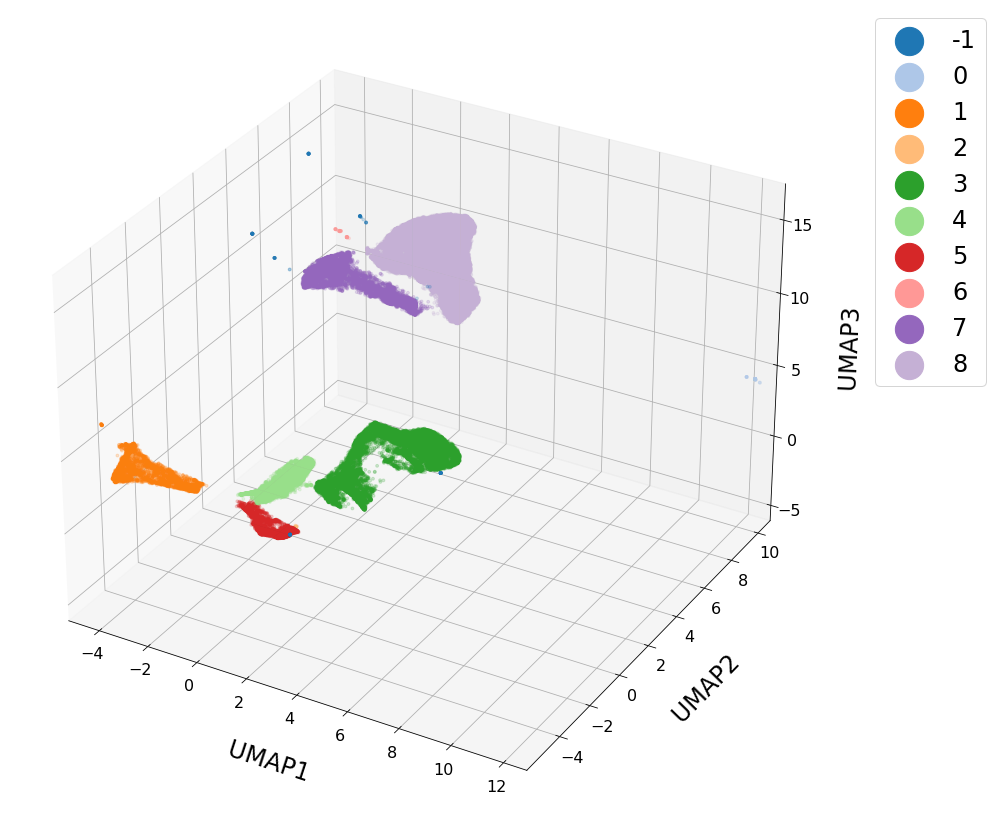

In [41]:
min_cluster_size= 30
min_samples = 30

ndim_factors = chosenfactors
print(f'min cluster size is {min_cluster_size}')
print(f'min_samples is {min_samples}')

lab_dr_df, exemplar_df = cp.hdbscan_clustering(
    dr_df_clean,  # run clustering on the DR dataframe or the raw df; here we keep it simple
    min_cluster_size=min_cluster_size,
    min_samples=min_samples,
    cluster_by='UMAPNDIM', #'NDIM',  # or 'UMAPNDIM' to cluster UMAP dims
    metric='euclidean',
    scalingmethod=None, #SCALING_METHOD, #None, #'minmax', #SCALING_METHOD,
    ndim_factors=chosenfactors,
    factors_to_transform=factorstotransform,
    factors_not_to_transform=factorstonottransform,
    plot=False,
    verbose=False,
    
)

print('Unique clusters (excluding -1):', sorted([c for c in lab_dr_df['label'].unique() if c != -1]))

cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=True, identifier='dr_df' + '_byCONDITION_',dotsize = 8, alpha=0.2, markerscale = 10) #color = label or condition  

        # # Save outputs
        # out_lab = os.path.join(OUT_PATH, 'lab_dr_df_shared_scaling.csv')
        # out_ex = os.path.join(OUT_PATH, 'exemplar_df_shared_scaling.csv')
        # lab_dr_df.to_csv(out_lab, index=False)
        # exemplar_df.to_csv(out_ex, index=False)
        # print('Saved:', out_lab)
        # print('Saved:', out_ex)

lab_dr_df.name='lab_dr_df'
name = lab_dr_df.name

lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv', index=False)
exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv', index=False)



In [42]:
# cp.interactive_plot_3D_UMAP(df=dr_df, colorby = 'condition', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAPwithclusters') # TavgUMAPwithclusters

In [43]:
#checkpoint - load the lab_dr_df from the csv file
lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')

## Then plot the 'fingerprint' plot of percentage in each cluster per condition

[0, 1, 2, 3, 4, 5, 6, 7, 8, -1]


Condition  Percent_condition_pts_in_ClusterID_0  \
Het        Het                              0.000000   
Homo      Homo                              0.000000   
Tg          Tg                              0.000000   
WT          WT                              0.408629   

      Percent_condition_pts_in_ClusterID_1  \
Het                               0.000000   
Homo                             24.166326   
Tg                                0.000000   
WT                                0.009503   

      Percent_condition_pts_in_ClusterID_2  \
Het                               0.554711   
Homo                              0.000000   
Tg                                0.000000   
WT                                0.000000   

      Percent_condition_pts_in_ClusterID_3  \
Het                              39.452888   
Homo                             23.669918   
Tg                               27.956245   
WT                                5.844341   

      Percent_condition_pts_in_ClusterID_4  \
Het                               0.000000   
Homo                              0.023360   
Tg                                0.000000   
WT                               52.513542   

      Percent_condition_pts_in_ClusterID_5  \
Het                               0.000000   
Homo                              6.435788   
Tg                                0.000000   
WT                               14.634610   

      Percent_condition_pts_in_ClusterID_6  \
Het                               0.250760   
Homo                              0.052561   
Tg                                0.027693   
WT                                0.000000   

      Percent_condition_pts_in_ClusterID_7  \
Het                              19.072948   
Homo                              0.000000   
Tg                               16.934367   
WT                               25.857645   

      Percent_condition_pts_in_ClusterID_8  \
Het                              40.417933   
Homo                             45.593646   
Tg                               54.984769   
WT                                0.028509   

      Percent_condition_pts_in_ClusterID_-1  
Het                                0.250760  
Homo                               0.058401  
Tg                                 0.096926  
WT                                 0.703222

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
These are the cluster colors: [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (1.0, 0.596078431372549, 0.5882352941176471, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)]


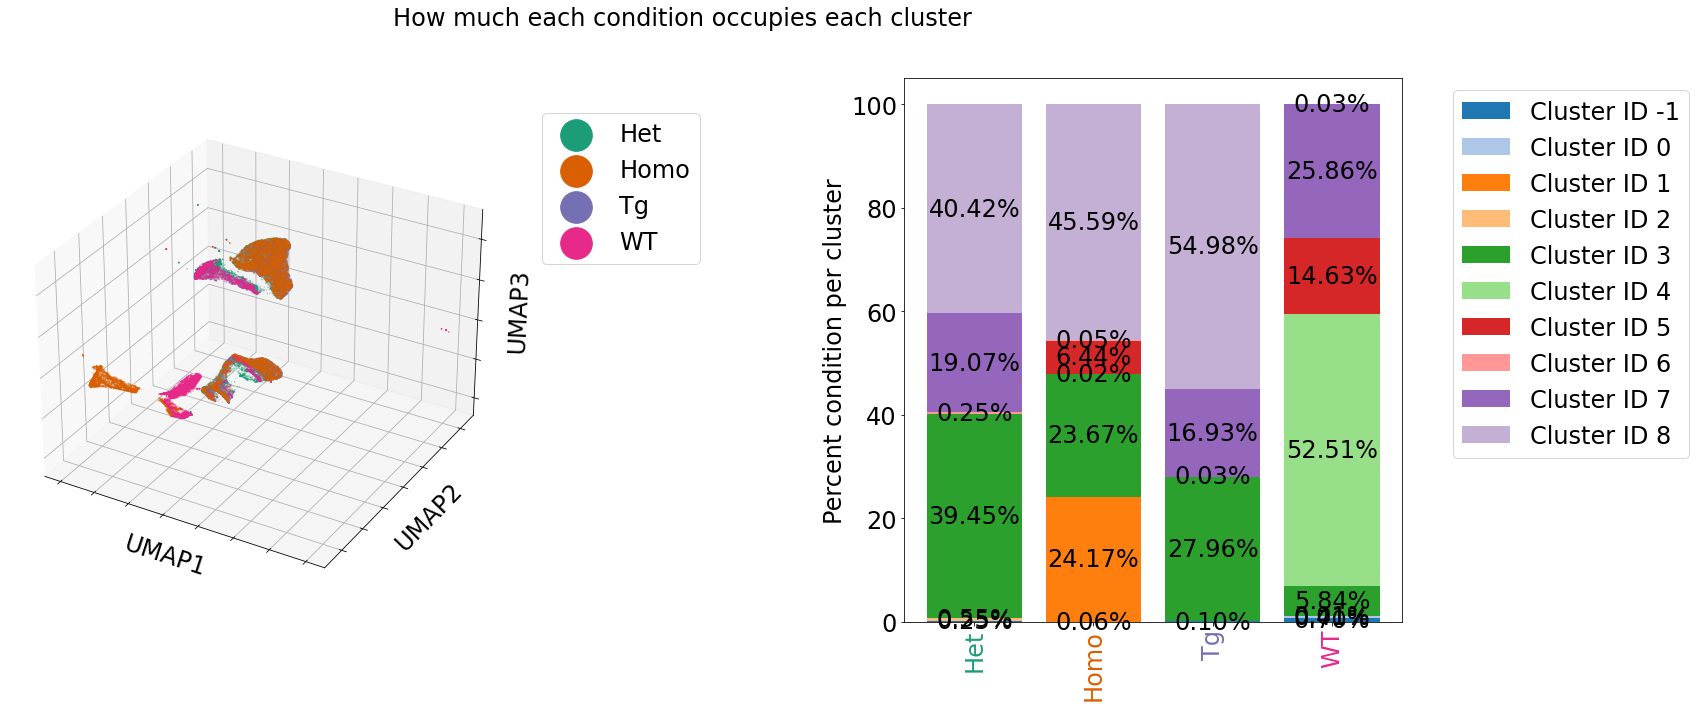

In [44]:
# This is the new combo
cluster_purity_df = cp.purity_pointsinclusterspercondition(lab_dr_df) 
display(cluster_purity_df)
f = cp.purityplot_percentcluspercondition(lab_dr_df, cluster_purity_df) 

### Optional: explore the clusters with interactive 3D plot

In [45]:
# cp.interactive_plot_3D_UMAP(df=lab_dr_df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAPwithclusters') # TavgUMAPwithclusters

### Optional: all other conditions colored grey, chosen condition in color

In [46]:
# df=lab_dr_df

# condlist = df['Condition_shortlabel'].unique().tolist() #get unique list of conditions from df
# print(condlist) # show the condition list
# # chosen_condition = '' #specify a chosen condition from the list
# chosen_condition = condlist[0] # or choose the first one
# print(chosen_condition)

# cp.interactive_plot_3D_UMAP_chosen_condition(df, chosen_condition, opacity_grey=0.3, marker_size_all=5,) #change opacity and marker size to suit the data

### Optional: make UMAP plots colored by metric contributors - the more intense the color, the higher the contribution the metric to a cluster

Coloring each UMAP by normalized metric values
Length of metrics is  14
Factors to be scaled using log2 and then minmax:
Factor: euclidean_dist will be transformed
Factor: segment_length will be transformed
Factor: cumulative_length will be transformed
Factor: speed will be transformed
Factor: orientedness will be transformed
Factor: directedness will not be transformed
Factor: turn_angle will not be transformed
Factor: endpoint_dir_ratio will be transformed
Factor: dir_autocorr will not be transformed
Factor: outreach_ratio will be transformed
Factor: MSD will be transformed
Factor: max_dist will be transformed
Factor: glob_turn_deg will not be transformed
Factor: arrest_coefficient will not be transformed


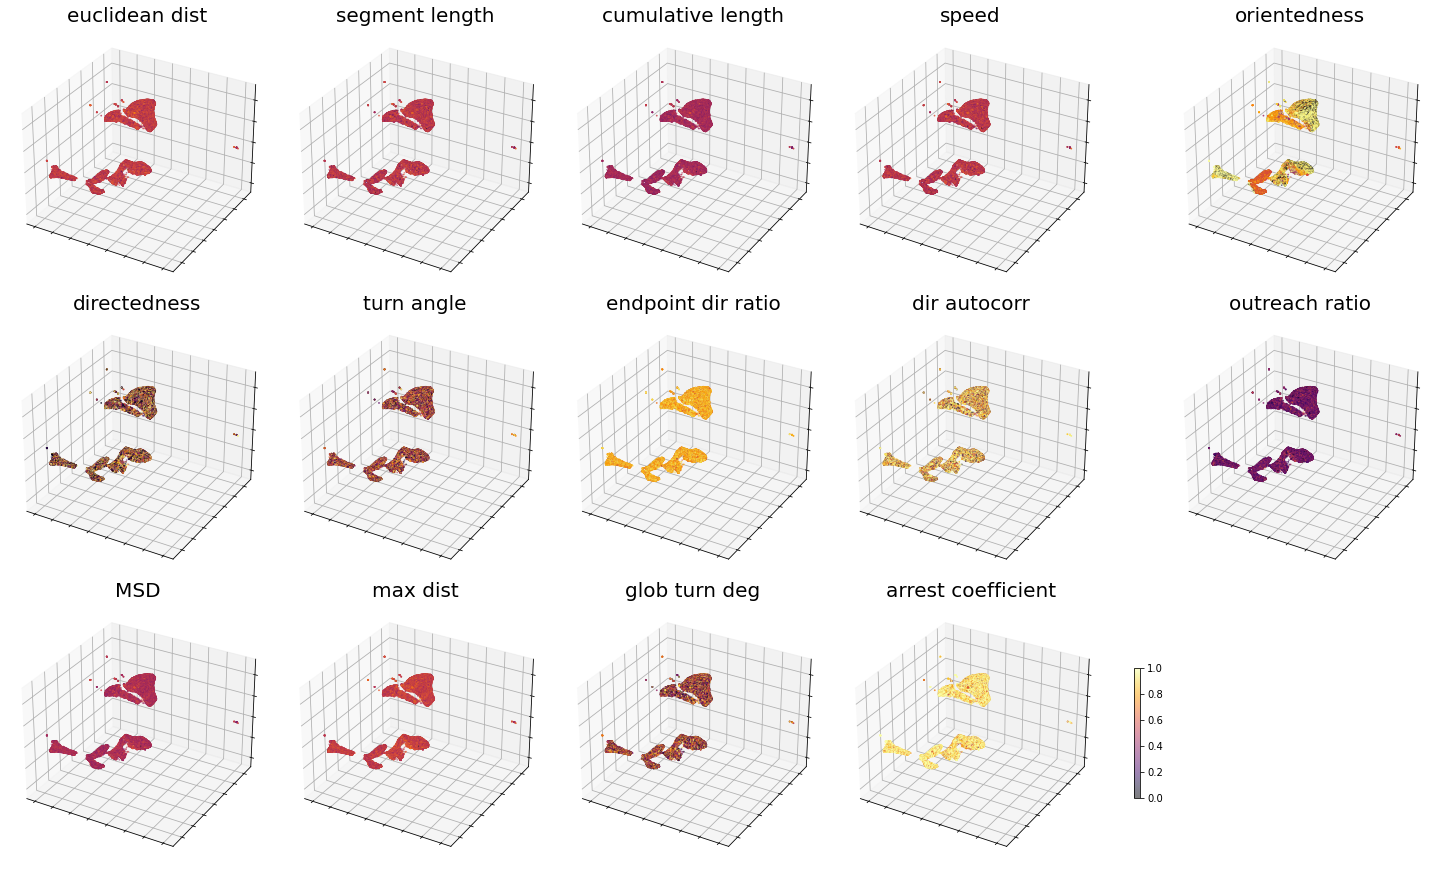

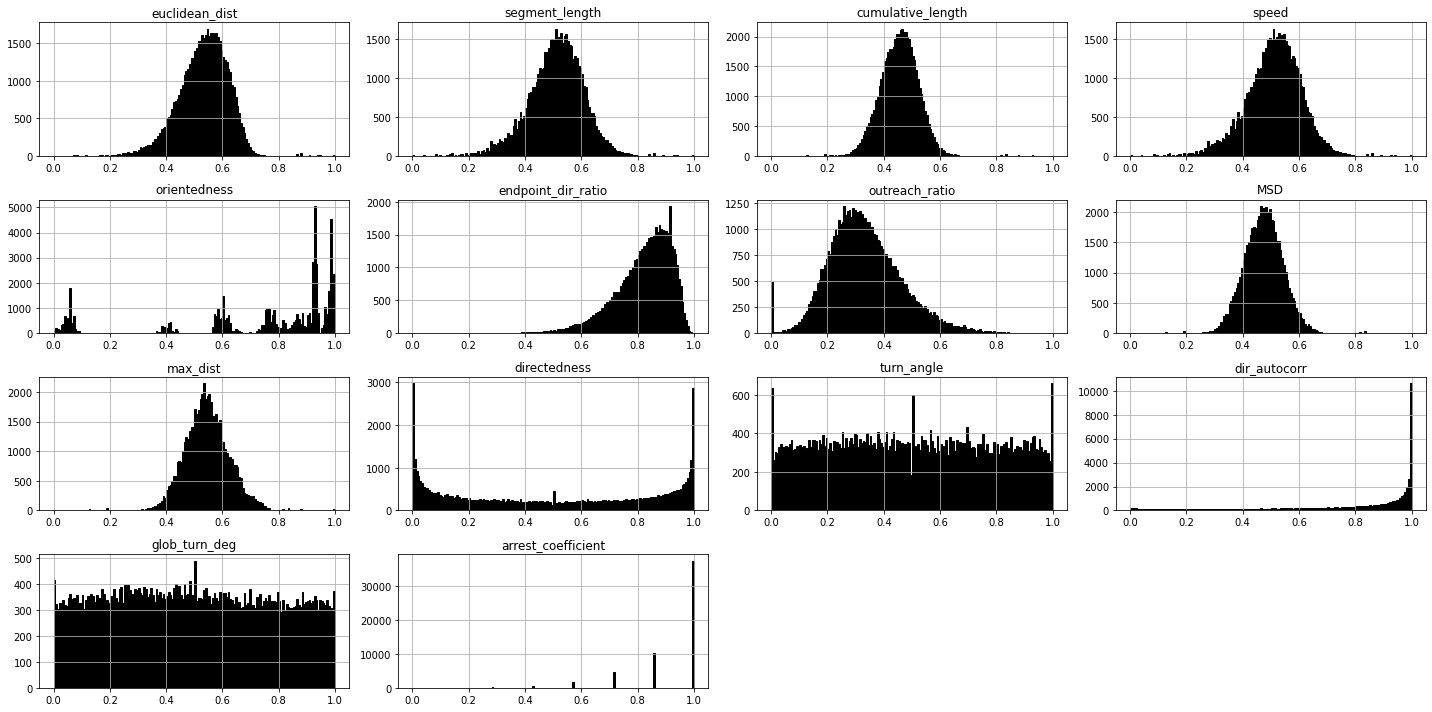

In [47]:
# First one colors per metric
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = DR_FACTORS, scalingmethod='choice',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = False, samplethedf = False)
#second one colors per condition
# cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=tptlabel_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='choice',
#                                                    identifier='inferno', colormap='inferno', coloredbycondition = True, samplethedf = False)

### Perform UMAP then HDBSCAN on the tavg_df

### at the moment, just do this step as it is needed for compatibility later on

In [48]:
lab_dr_df['tavg_label'] = np.random.randint(0, 5, lab_dr_df.shape[0])
lab_tavg_lab_dr_df = lab_dr_df

In [49]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv', index=False)


In [50]:
# load that df
lab_tavg_lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')

## Quantify the plasticity 

This part counts how many times cells switch between those clusters we defined over their lifetime

The function now returns these cluster change metrics:

cum_n_changes, cum_n_labels (cumulative)
twind_n_changes, twind_n_labels (time-windowed)

In [51]:
tptlabel_dr_df = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df)
tptlabel_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv', index=False)

  0%|          | 6/1382 [00:00<00:25, 54.05it/s]

Time window is 8.0 frames: applied multiplier = 1.0


  1%|          | 596/55250 [00:00<00:18, 2961.58it/s]

Checking dataframe


100%|██████████| 55250/55250 [00:18<00:00, 2952.97it/s]


### Plots of plasticity

In [52]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

Original dataframe shape: (55250, 64)
NaN counts per column:
  label: 0 NaN values
  twind_n_changes: 0 NaN values
  twind_n_labels: 0 NaN values
  frame: 0 NaN values
  Condition_shortlabel: 0 NaN values
Found 4 unique conditions: ['Het', 'Homo', 'Tg', 'WT']
Dataframe shape after removing NaNs in plotting columns: (55250, 64)
Removed 0 rows due to NaN values in plotting columns
Time window mins:  5.3


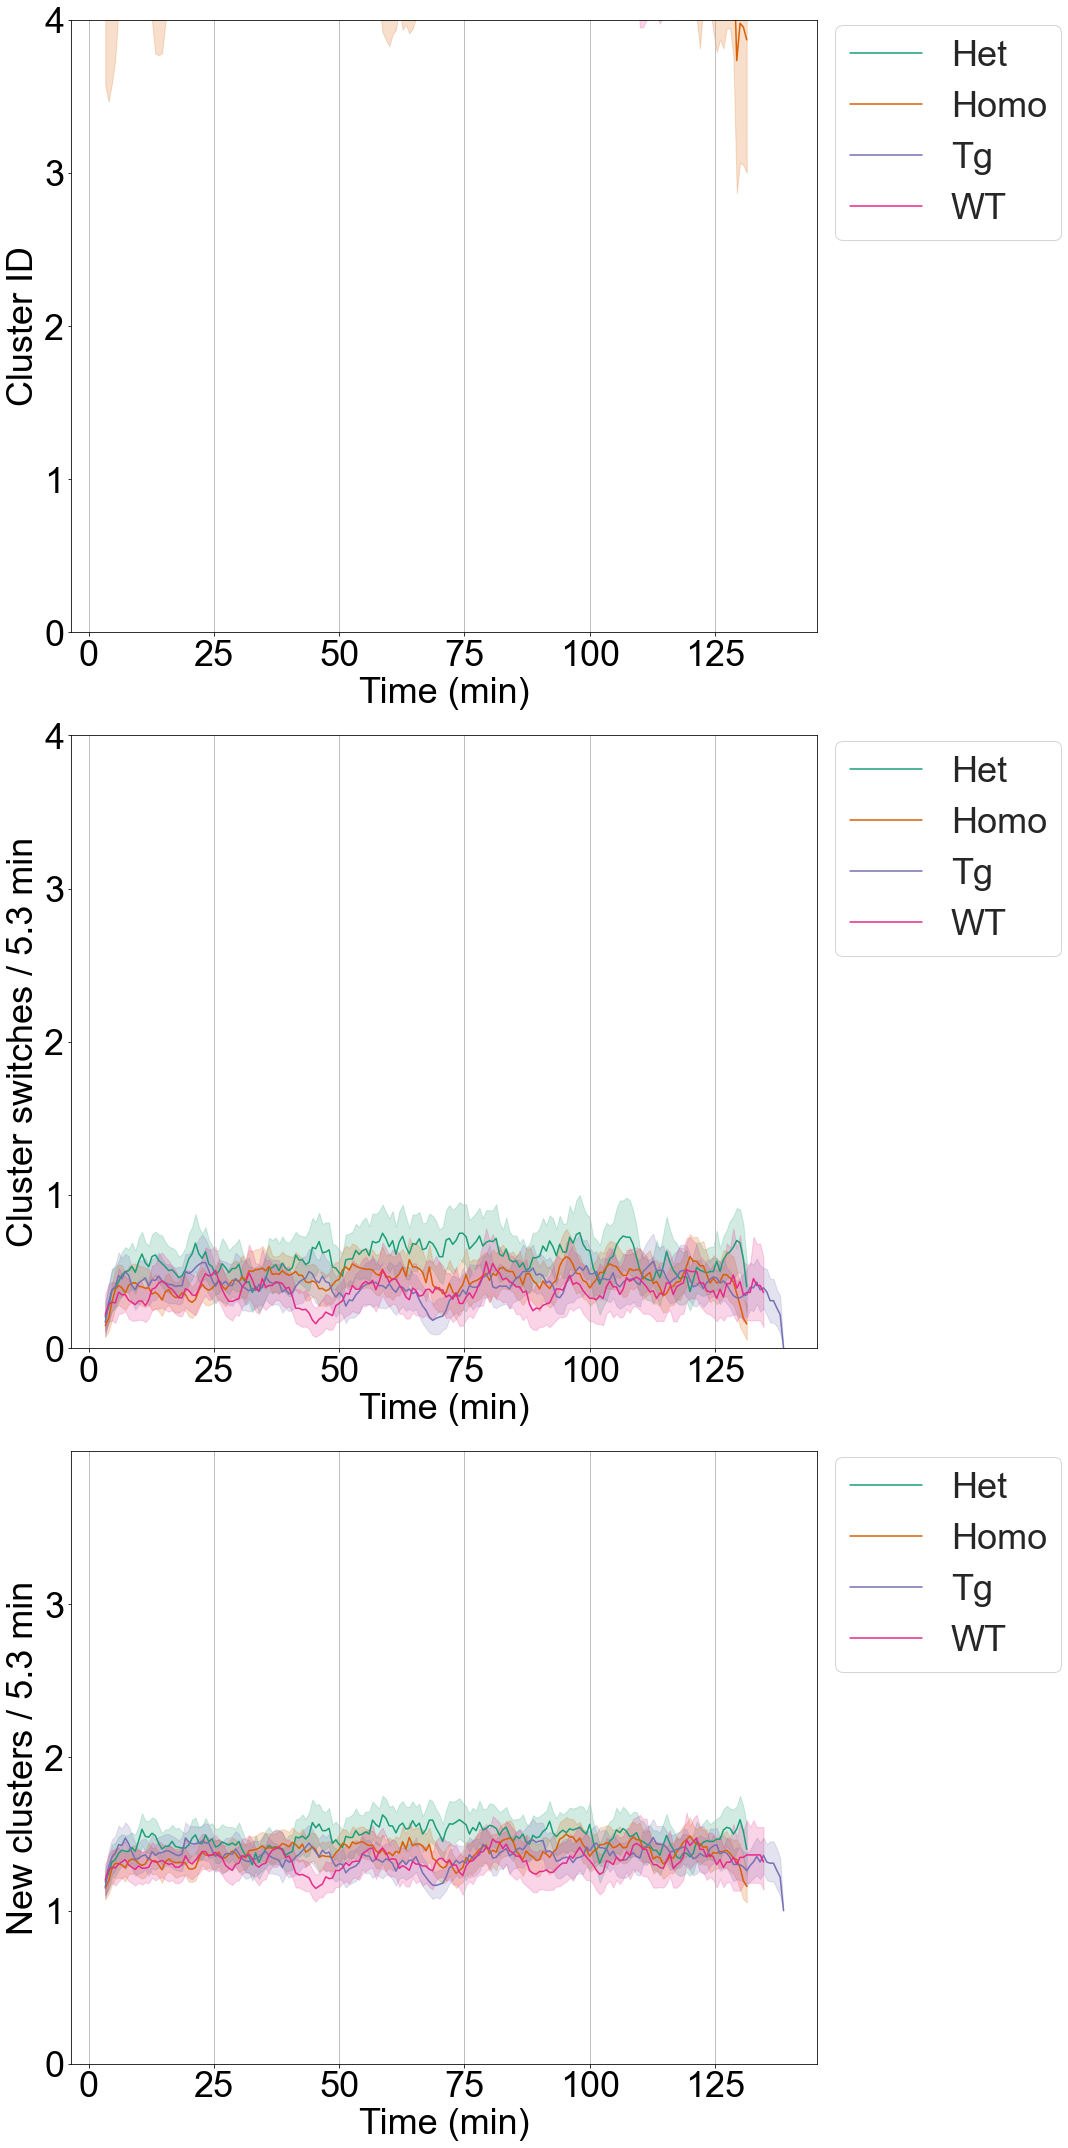

In [53]:
df=tptlabel_dr_df
# all='\_allcells'
cp.plot_plasticity_changes(df, identifier='\_allcells', maxy=4) #problem with NaNs in the data

Condition Replicate_ID twind_n_changes  count    percent
0        Het           NA               0   7195  54.673252
1        Het           NA               1   4658  35.395137
2        Het           NA               2   1082   8.221884
3        Het           NA               3    180   1.367781
4        Het           NA               4     36   0.273556
5        Het           NA               5      6   0.045593
6        Het           NA               6      3   0.022796
7       Homo           NA               0  10682  62.383928
8       Homo           NA               1   5365  31.332126
9       Homo           NA               2    979   5.717456
10      Homo           NA               3     86   0.502248
11      Homo           NA               4     11   0.064241
12      Homo           NA               5      0   0.000000
13      Homo           NA               6      0   0.000000
14        Tg           NA               0   9318  64.511216
15        Tg           NA               1   4336  30.019385
16        Tg           NA               2    720   4.984769
17        Tg           NA               3     65   0.450014
18        Tg           NA               4      2   0.013847
19        Tg           NA               5      3   0.020770
20        Tg           NA               6      0   0.000000
21        WT           NA               0   7199  68.412050
22        WT           NA               1   2803  26.636891
23        WT           NA               2    460   4.371377
24        WT           NA               3     59   0.560677
25        WT           NA               4      2   0.019006
26        WT           NA               5      0   0.000000
27        WT           NA               6      0   0.000000

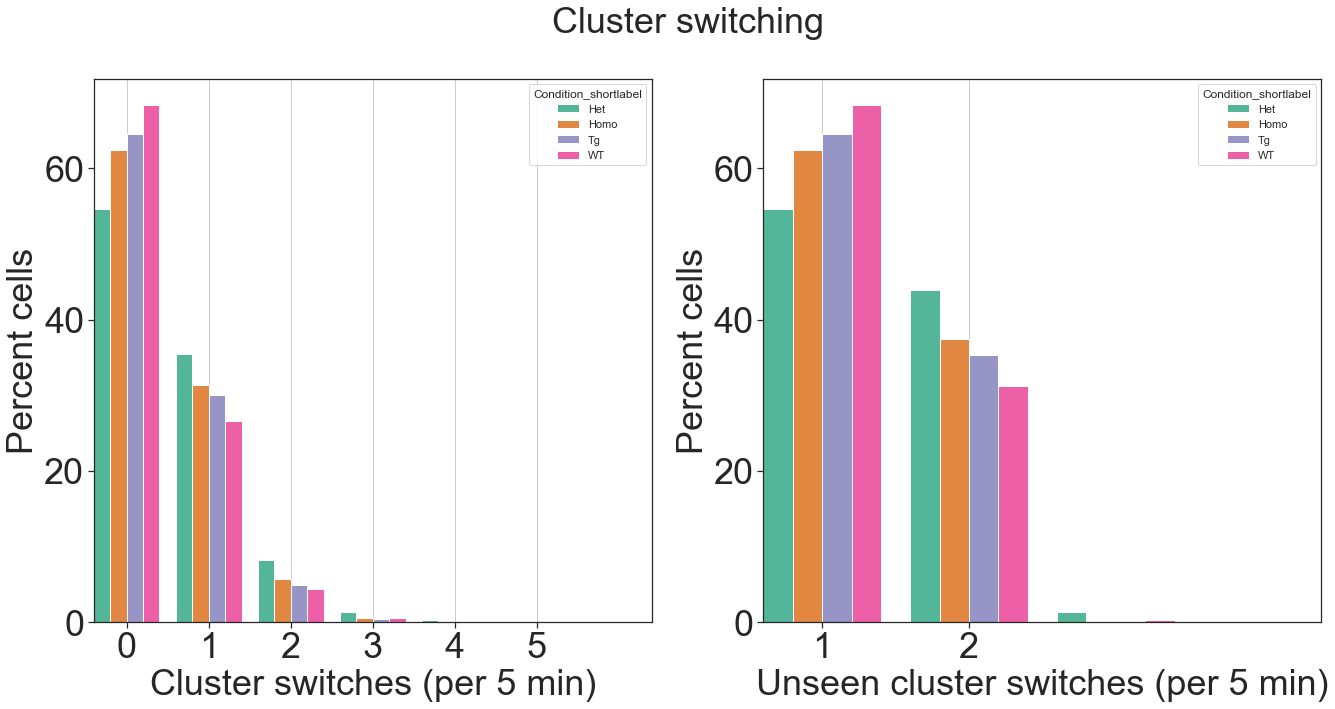

In [54]:
df=tptlabel_dr_df
cp.plot_plasticity_countplots(df, identifier='_allcells')

Time window mins:  5.3


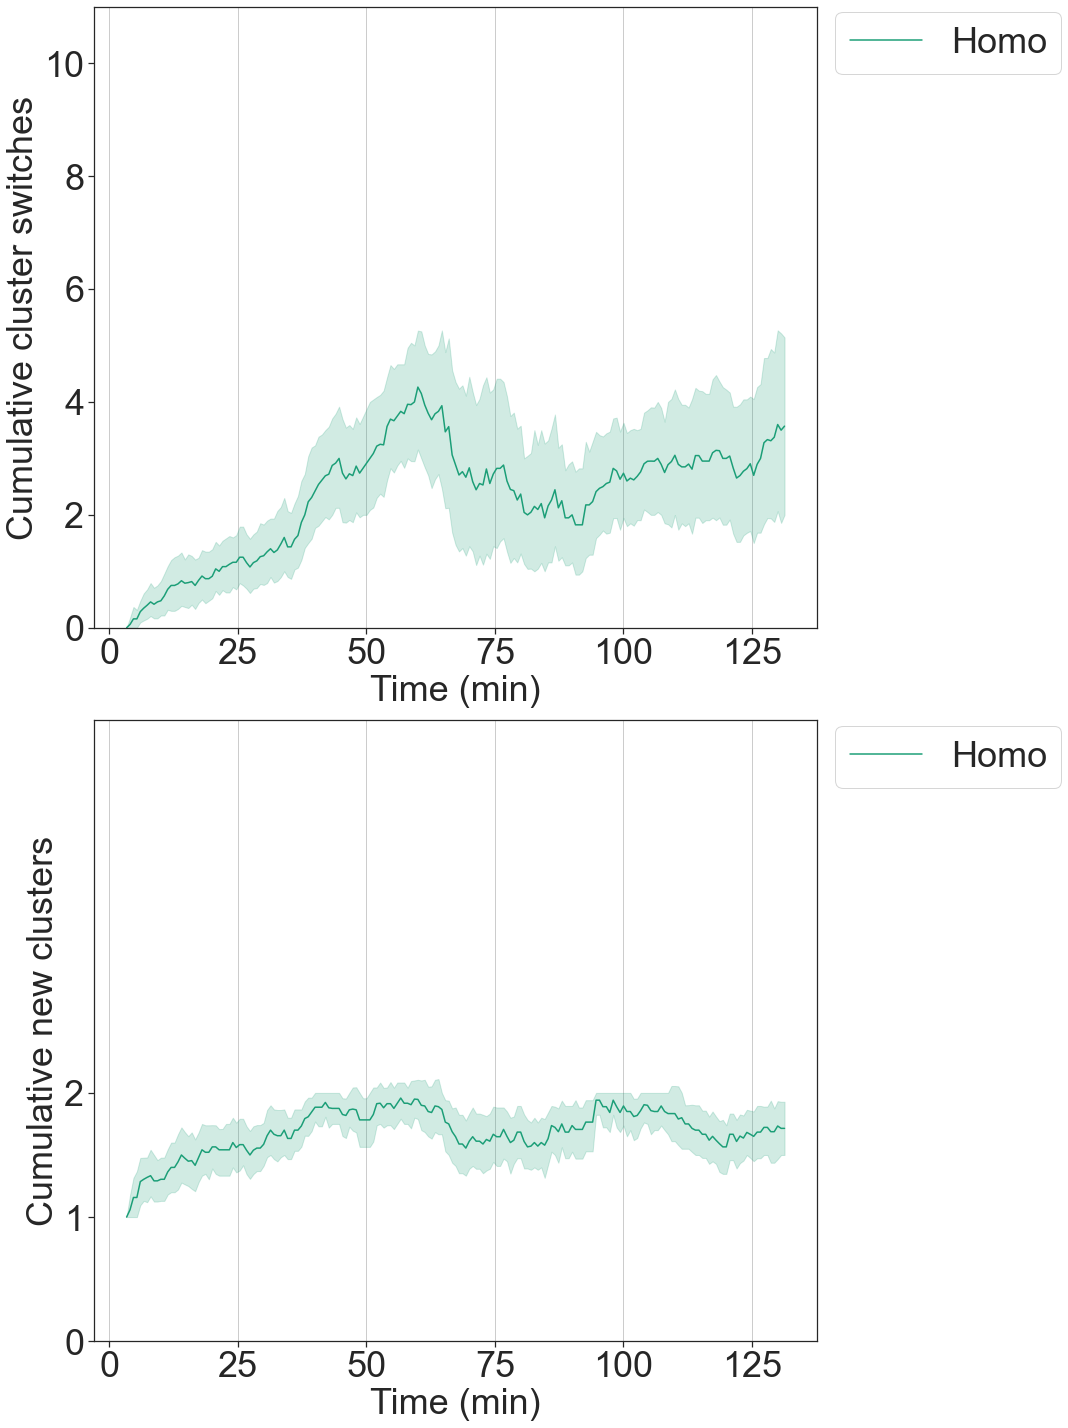

In [55]:
df=tptlabel_dr_df
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_allcells', miny=None, maxy=None, t_window_multiplier = cp.T_WINDOW_MULTIPLIER, plotallcells = False)

# Disambiguate the clusters

### First, choose a number of exemplar cells to pick out from the exemplar cell list to display

In [56]:
# Choose a number of exemplars to display for each cluster
n=2
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

Factors to be scaled using log2 and then minmax:
Using precalculated factor lists from analyze_factors_for_choice_scaling()
Factors TO transform (log2+minmax): 6
  ['euclidean_dist', 'segment_length', 'cumulative_length', 'speed', 'MSD', 'max_dist']
Factors NOT to transform (minmax only): 6
  ['orientedness', 'endpoint_dir_ratio', 'dir_autocorr', 'outreach_ratio', 'arrest_coefficient', 'Sphericity']


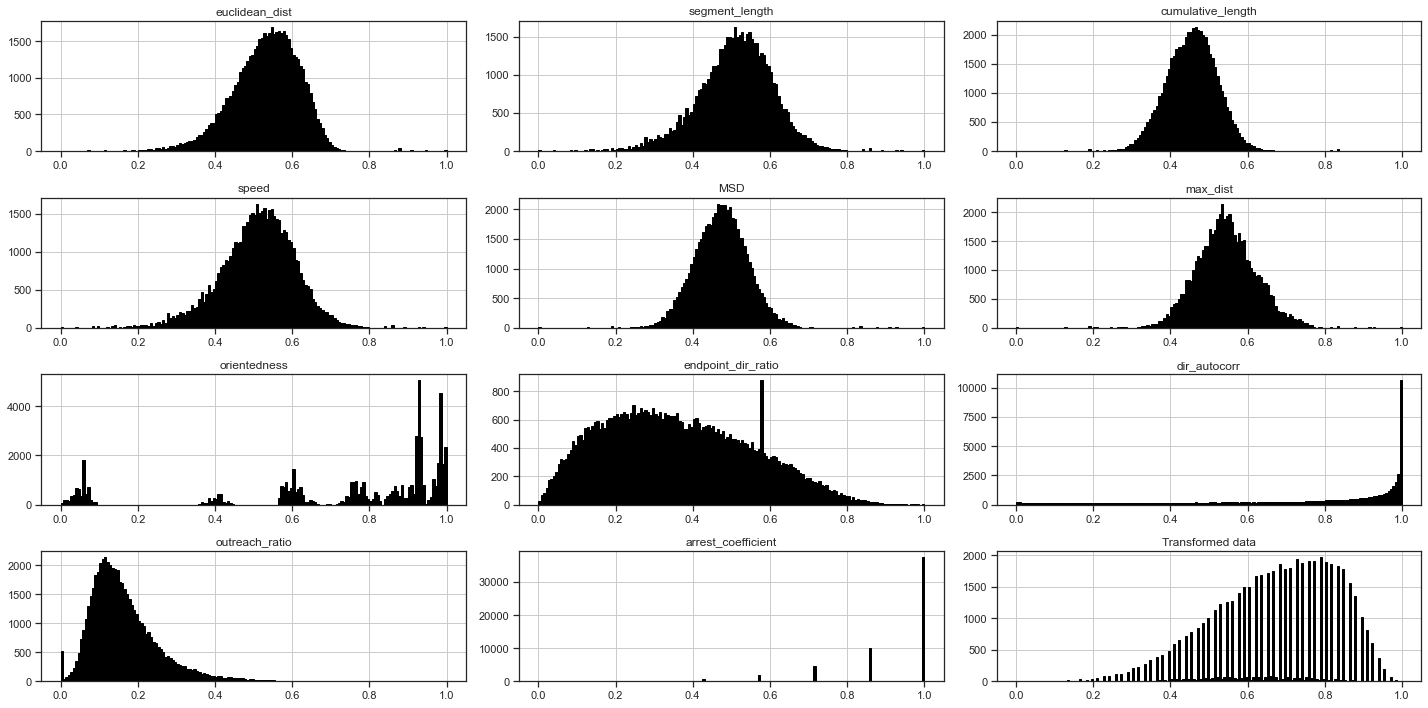

In [57]:
###################### No need to run these commented lines if you have already chosen the factors to use using this method above ########################

# # Get factor analysis results
# factor_analysis = cp.analyze_factors_for_choice_scaling(
#     df=comb_df, 
#     factors_list=DR_FACTORS,
#     show_distributions=True
# )

# # Use the suggestions
# factors_to_log_transform = factor_analysis['suggested_to_transform']
# factors_minmax_only = factor_analysis['suggested_not_to_transform']

# # Clean the factors
# factors_to_log_transform_clean = [f for f in factors_to_log_transform if f in factors_clean]
# factors_minmax_only_clean = [f for f in factors_minmax_only if f in factors_clean]

# Use in contribution_to_clusters
top_dictionary, contributions_df_singletpoints, scaled_df = cp.contribution_to_clusters(
    df_in=tptlabel_dr_df,  
    howmanyfactors=3, 
    dr_factors=chosenfactors,
    scalingmethod='choice',
    factors_to_log_transform_clean=factorstotransform,
    factors_minmax_only_clean=factorstonottransform
)

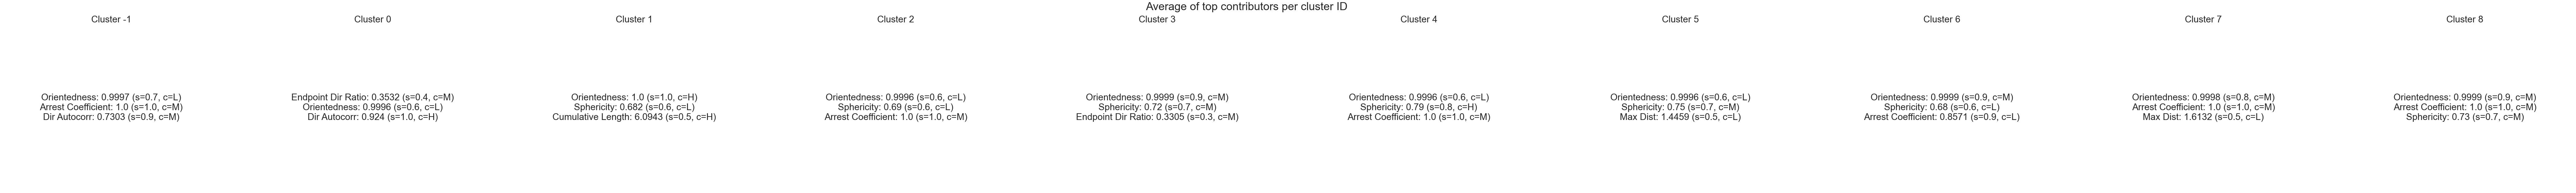

In [58]:
cp.plot_cluster_averages(top_dictionary, df, scaled_df)

Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)


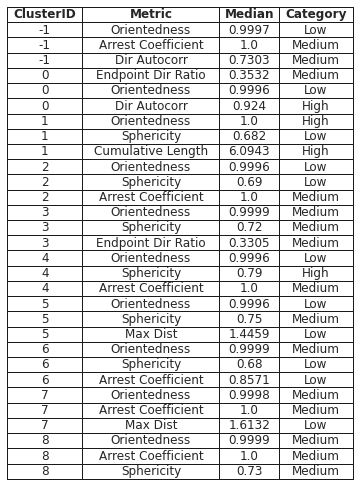

In [59]:


result_df = cp.create_cluster_averages_table(top_dictionary, df, scaled_df)


In [60]:
# # you can't do this without the contours (segmentations), which you don't have here

# cp.disambiguate_timepoint(df, exemplar_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True, trajectory = False) 

In [61]:

tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

## Then, to visualize single cells with many timepoints, select cells with lots of timepoints

Filter cells by trajectory length: Only keeps cells that have more than numberofdesiredtimepoints timepoints
Sample cells per cluster: Tries to get numberofcellspercluster cells from each cluster
Create exemplar datasets: Outputs both a filtered exemplar dataframe and full trajectory tracks for those cells

In [62]:
#### User inputs ####
whole_df = tptlabel_dr_df
exemplar_df = exemplar_df
numberofdesiredtimepoints = int(whole_df['ntpts'].mean())
# numberofdesiredtimepoints = 200
numberofcellspercluster = 40
num_clusters_whole_dataset = len(whole_df['label'].unique())

override = int((numberofcellspercluster*num_clusters_whole_dataset)*0.7)
#####################

# exemplar_df_filt, exemplar_cell_tracks_df = cp.filter_exemplars(whole_df=whole_df, exemplar_df = exemplar_df, numberofdesiredtimepoints = numberofdesiredtimepoints, 
#                                                                     numberofcellspercluster = numberofcellspercluster, override = override)

exemplar_df_filt, exemplar_cell_tracks_df = cp.filter_exemplars(
    whole_df=whole_df, 
    exemplar_df=exemplar_df, 
    numberofdesiredtimepoints=numberofdesiredtimepoints,
    numberofcellspercluster=numberofcellspercluster, 
    override=override,
    verbose=False  # This eliminates most printouts
)

Time window mins:  5.3


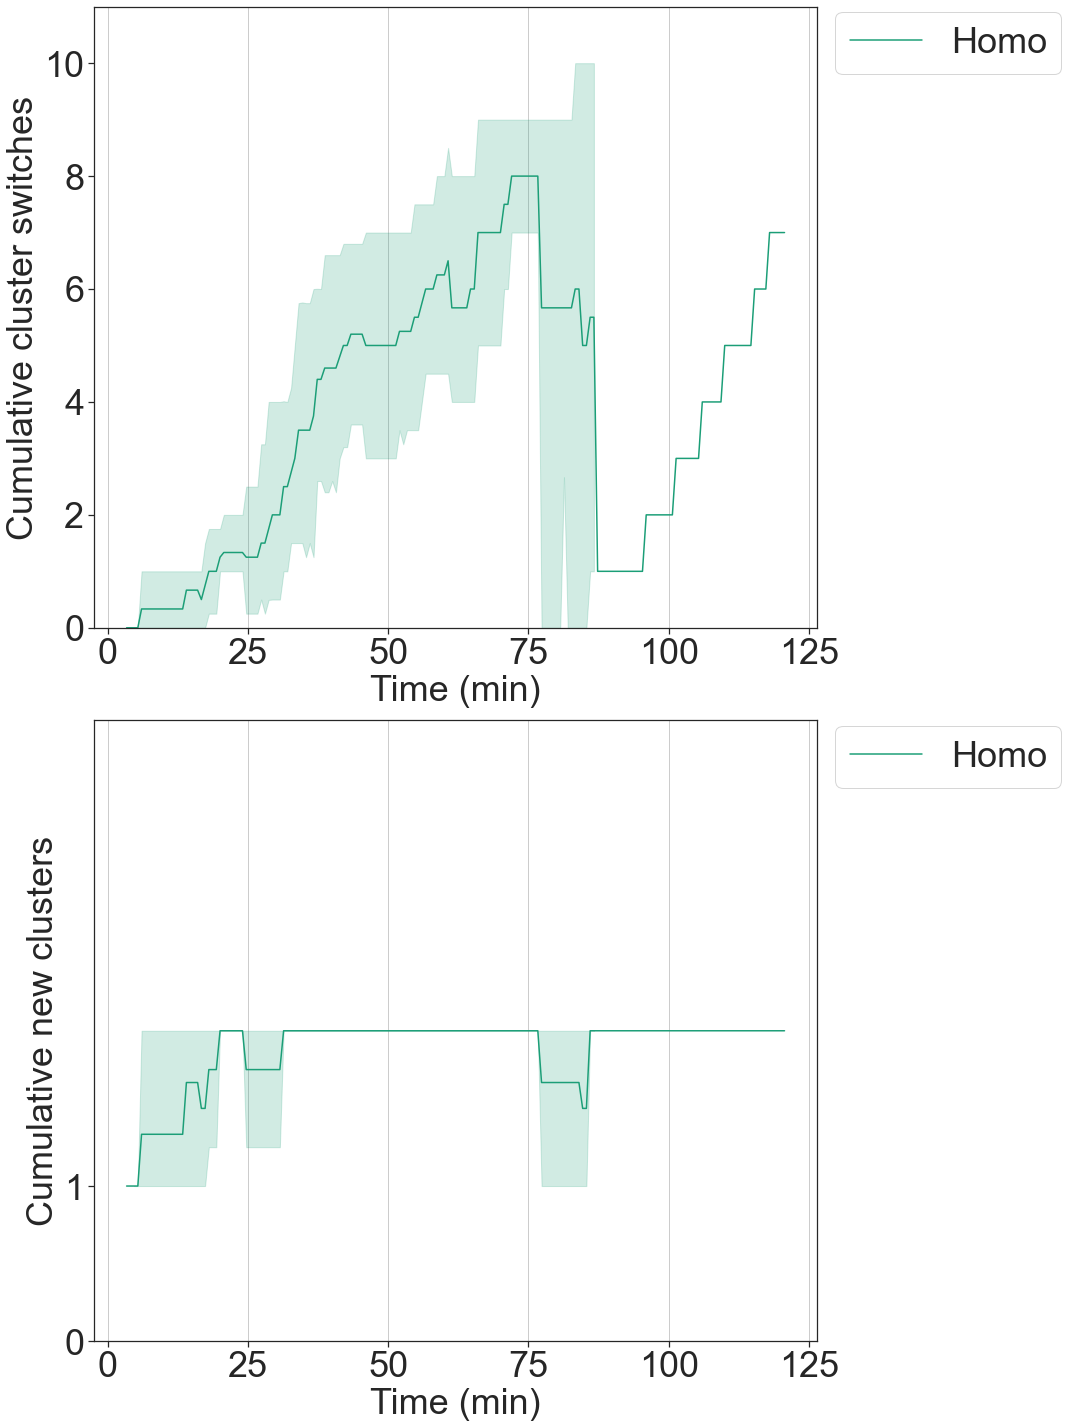

In [63]:
df=exemplar_cell_tracks_df
# cp.plot_cumulative_plasticity_changes_test2(df, identifier='\_exemplars_only_3_df__', miny=None, maxy=None, t_window_multiplier = 1, plotallcells = True) #deprecated, use the small multiples version
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_exemplars_only_3_df__', miny=None, maxy=None, t_window_multiplier = 1, plotallcells = False)

### Plot any factor as small multiples from the exemplars

KeyboardInterrupt: 

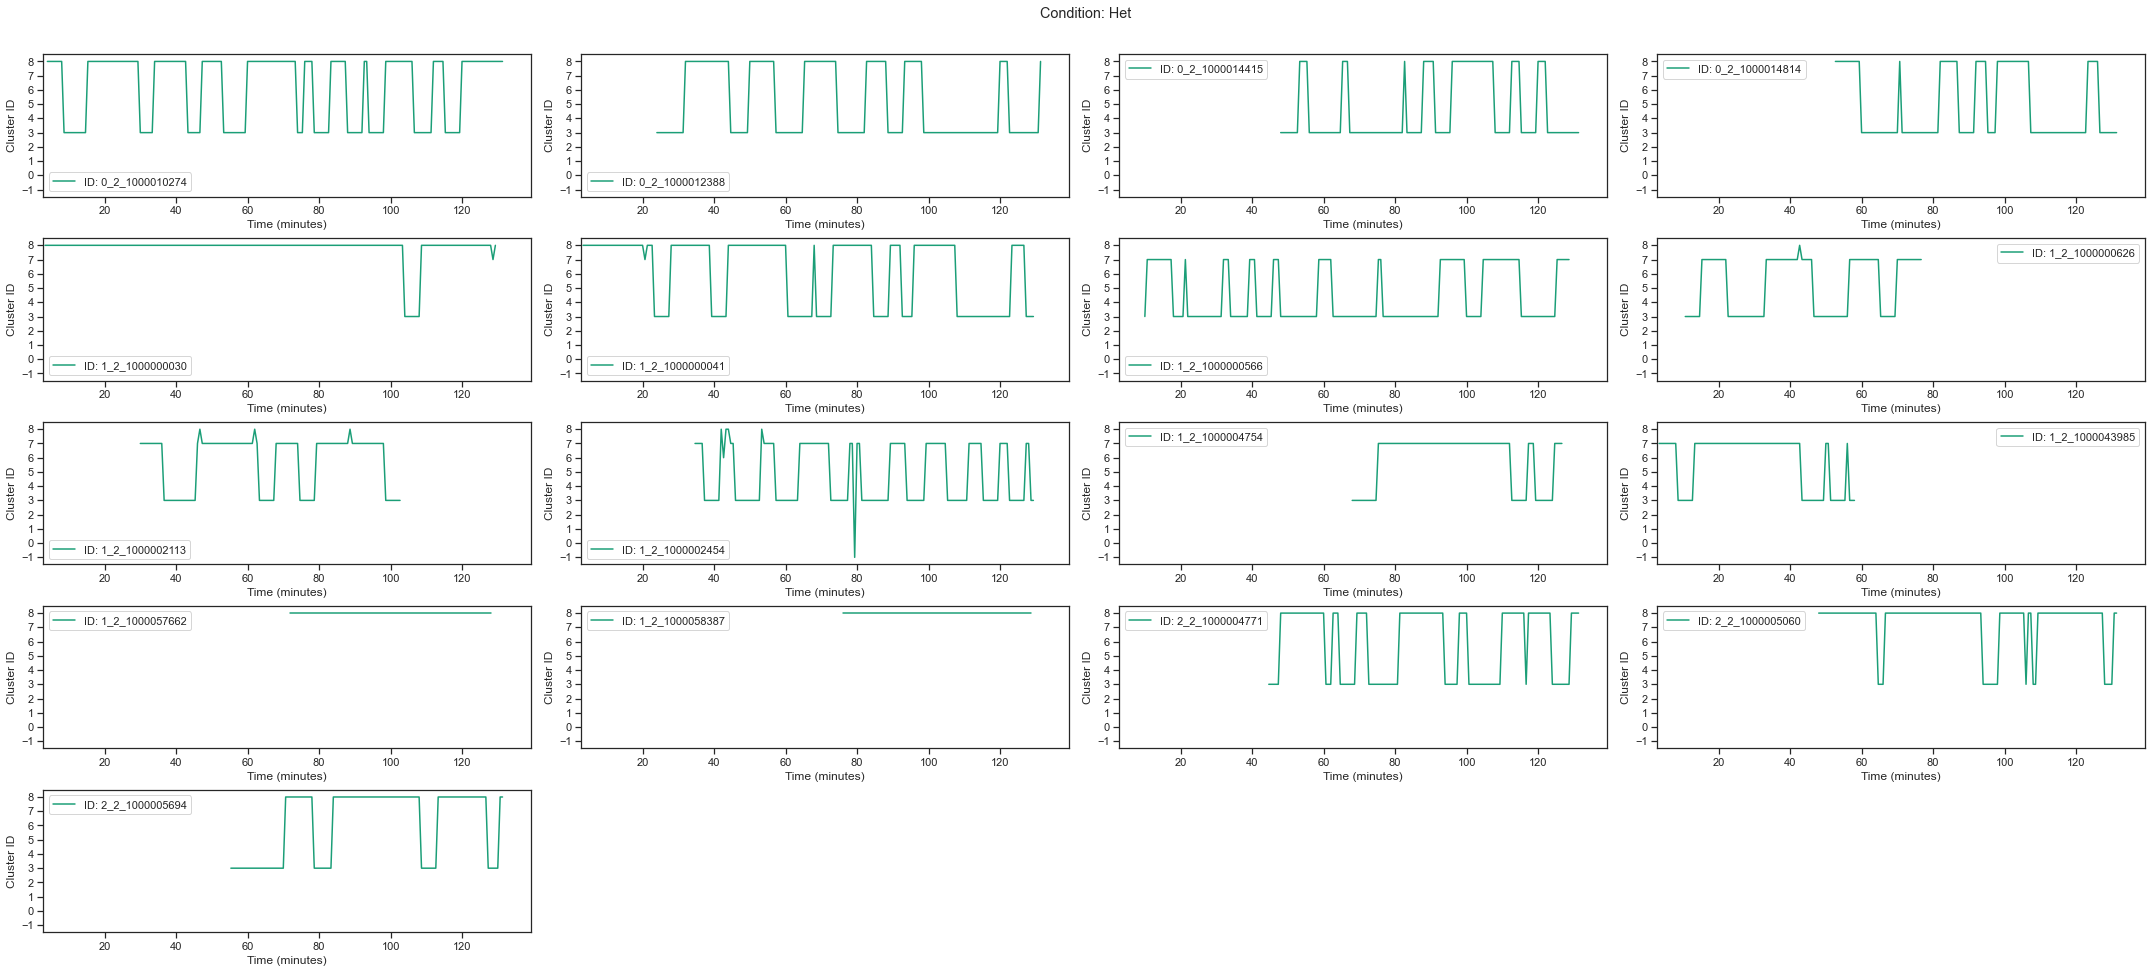

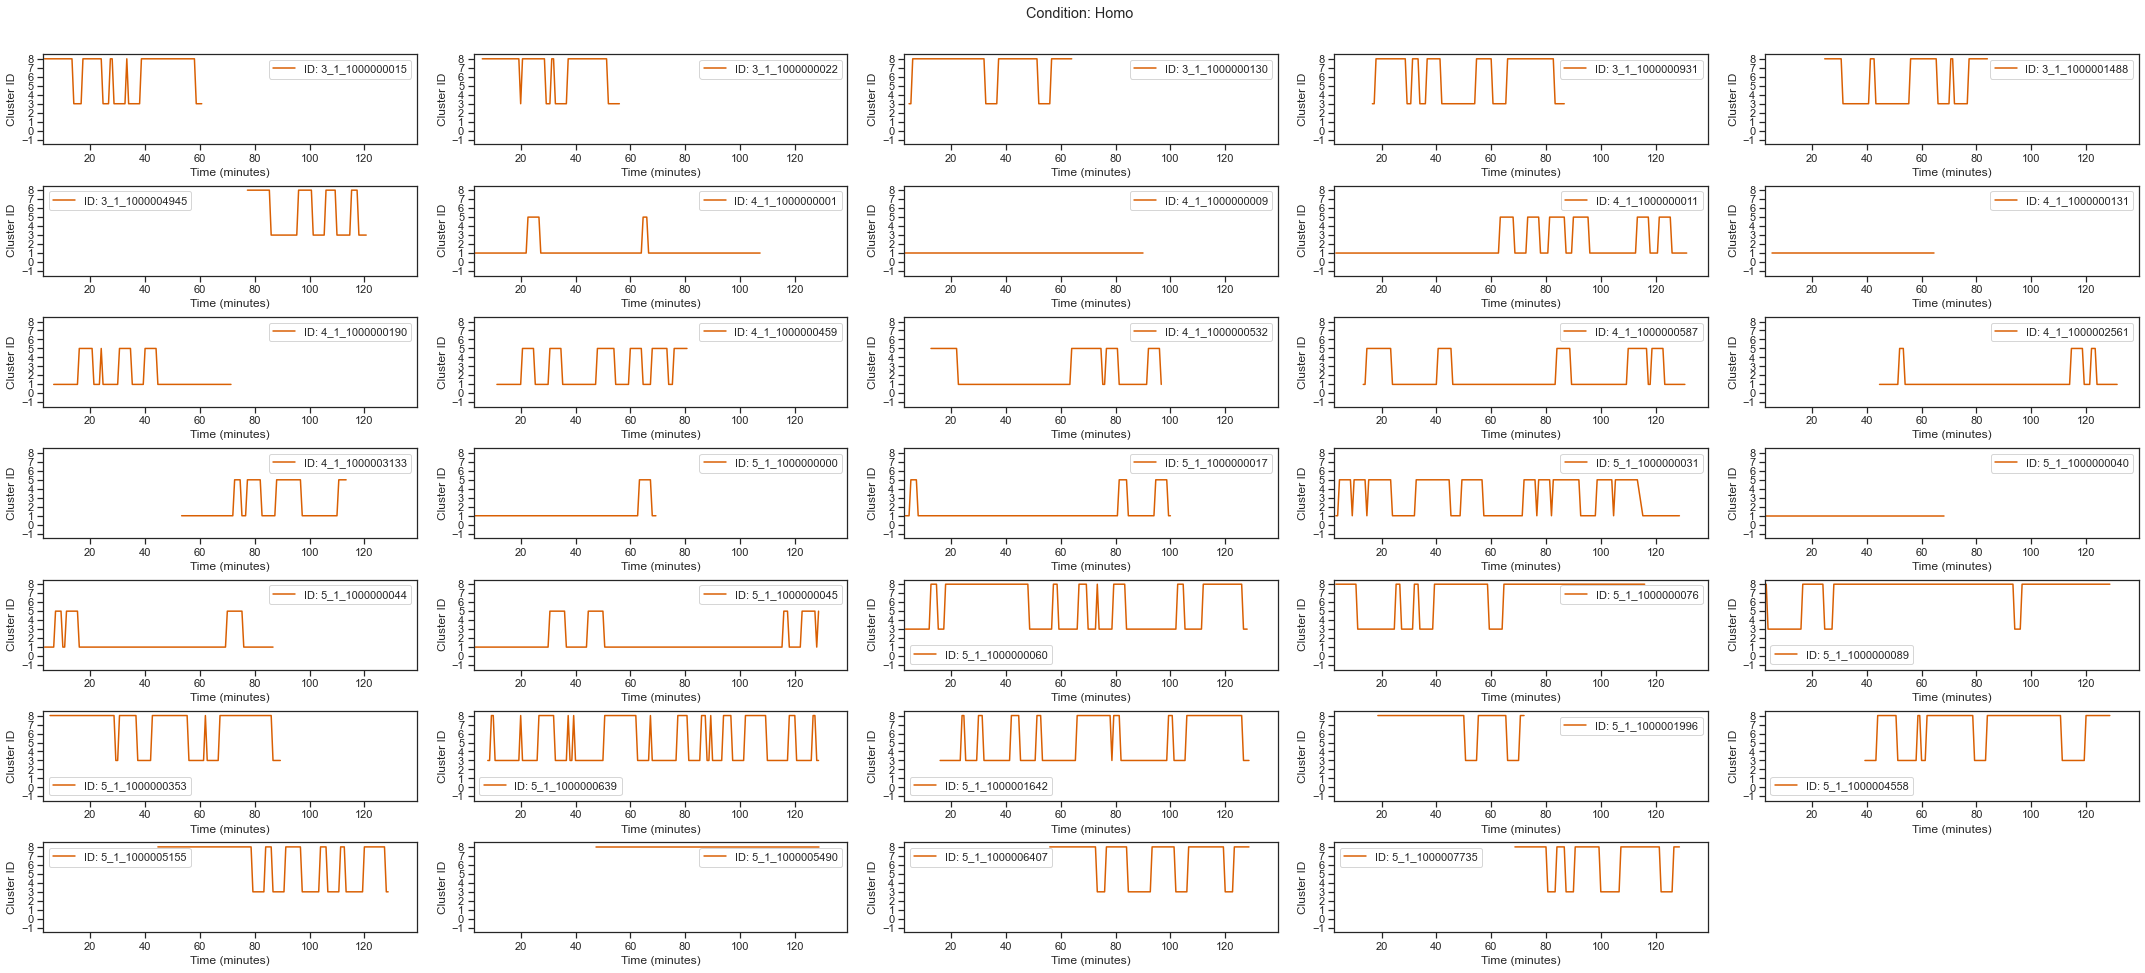

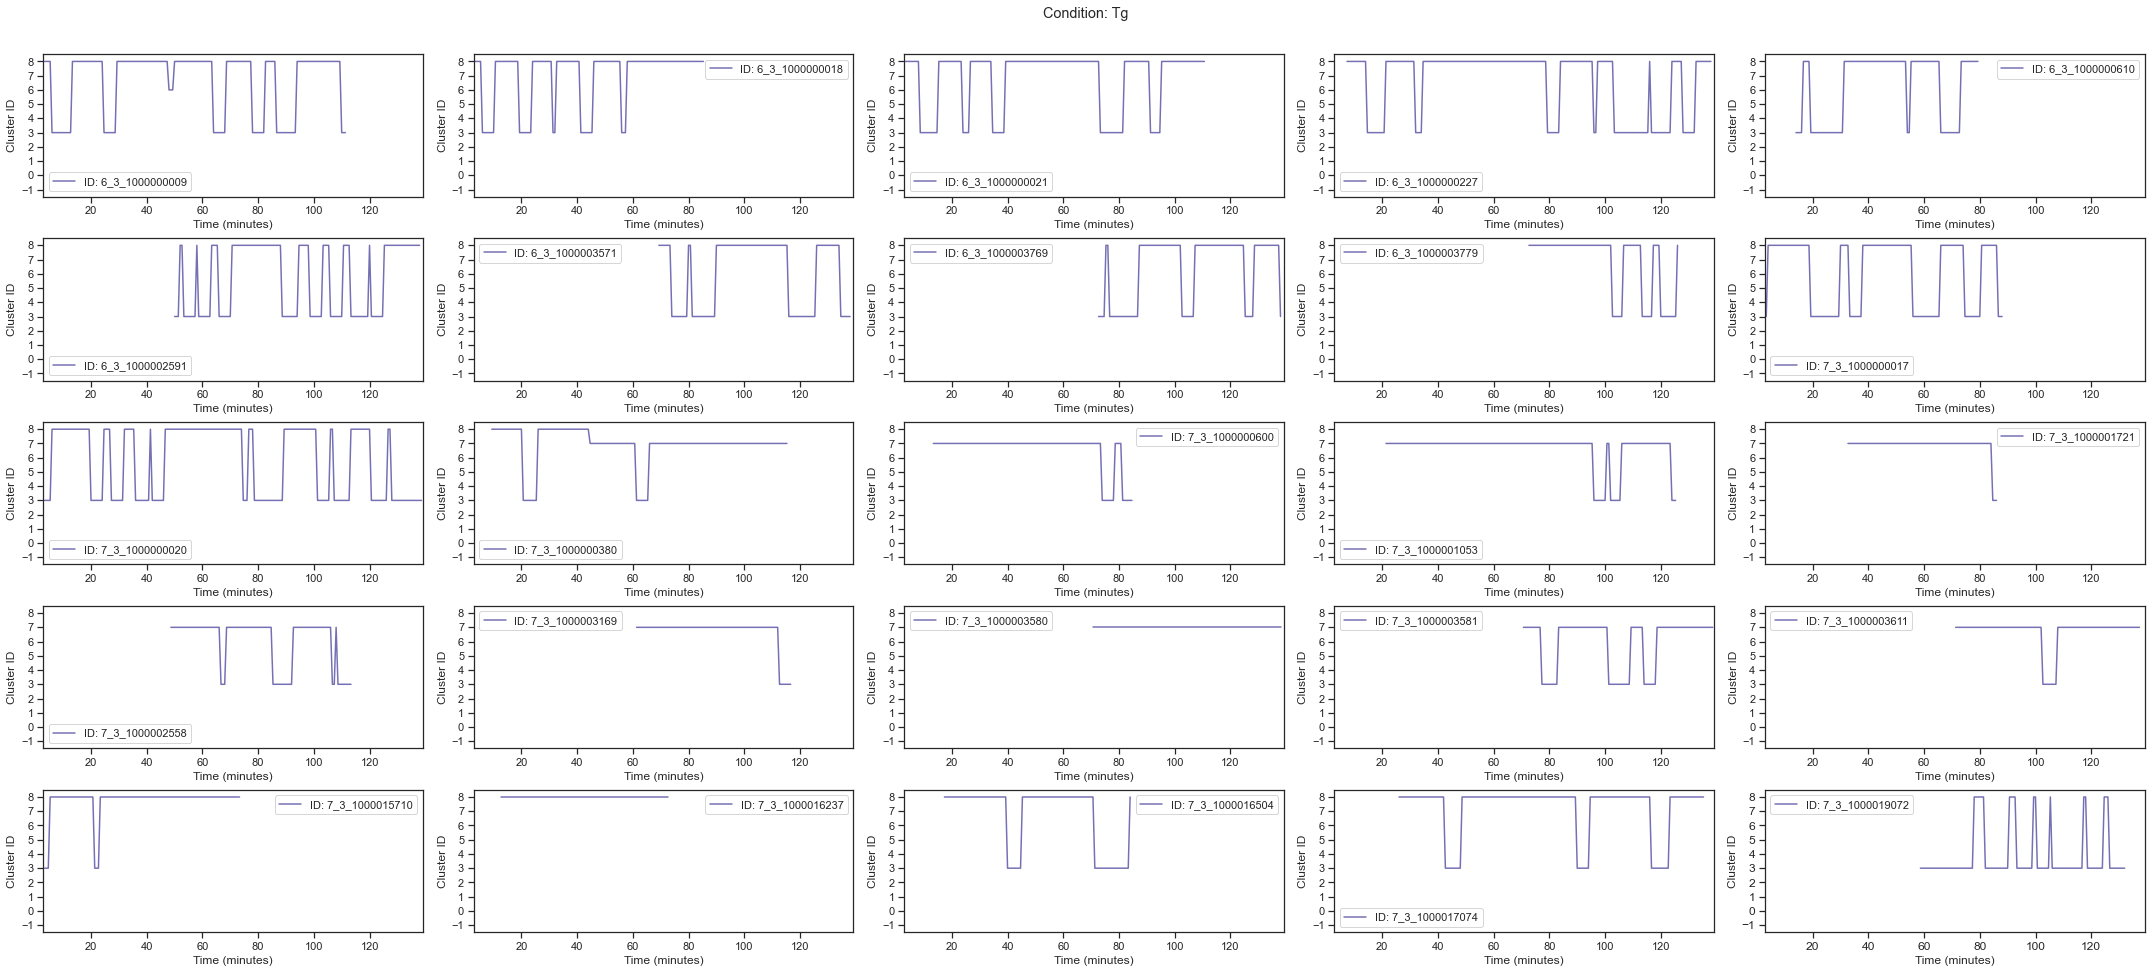

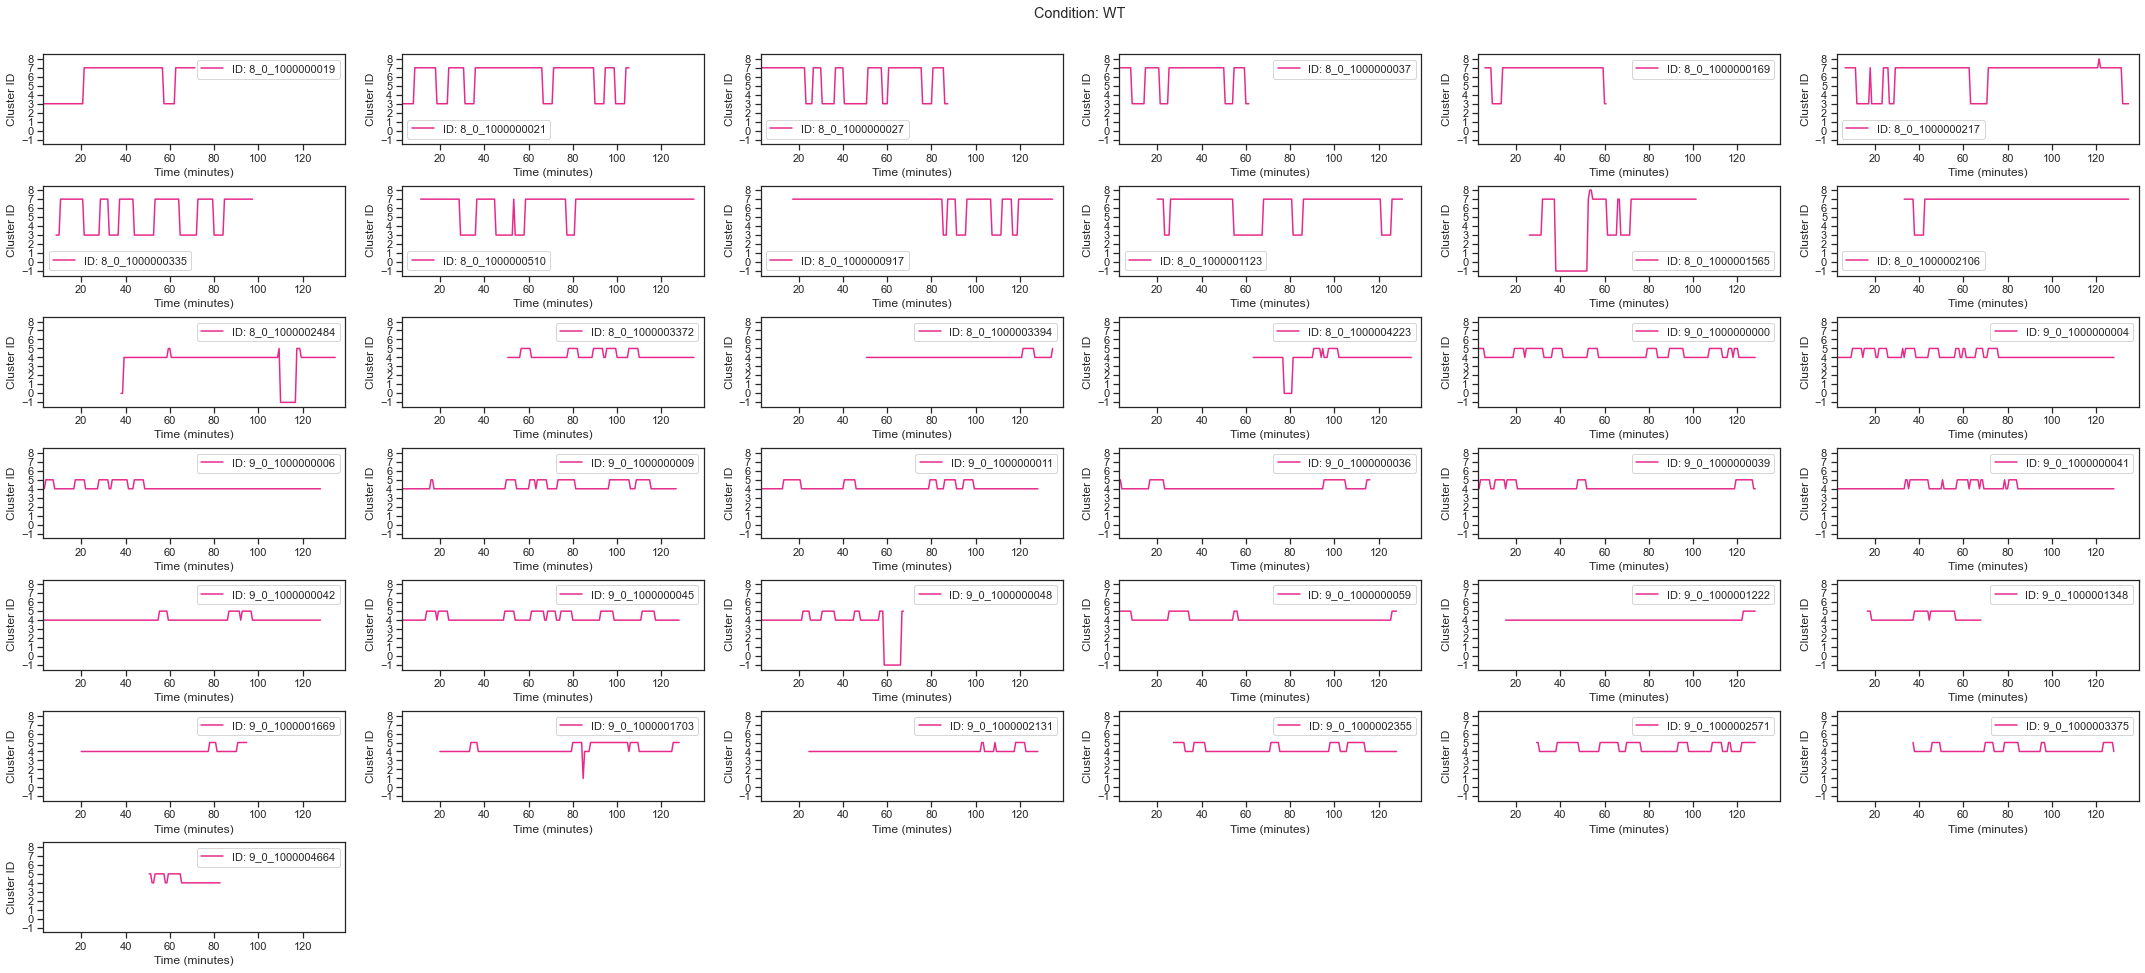

In [64]:
df = exemplar_cell_tracks_df
whichcolumntoplot = 'label'

cp.plot_small_multiples(df, whichcolumntoplot)

<div class="alert alert-block alert-success">
<h2>4. Trajectory measurement: Damerau-Levenshtein</h1>
</div>

In [65]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [ ]:
# count the number of points per unique id (uniq_id)
temp_df = dr_df.copy()
numpoints_df = temp_df.groupby('uniq_id').size().reset_index(name='numpoints')


(array([  1.,   2., 106., 146.,  76.,  90.,  90.,  80.,  59.,  58.,  62.,
         49.,  51.,  56.,  31.,  40.,  42.,  33.,  34.,  32.,  31.,  28.,
         21.,  24.,  24.,  19.,  17.,  20.,  16.,  16.,  15.,  15.,   7.,
         12.,   6.,  14.,   7.,   8.,   7.,   6.,   7.,   5.,   3.,   8.,
          5.,   6.,   5.,   7.,   8.,   3.,   7.,   7.,   2.,   5.,   3.,
          3.,   2.,   3.,   4.,   1.,   2.,   4.,   9.,   1.,   4.,   3.,
          2.,   1.,   1.,   1.,   1.,   3.,   1.,   2.,   1.,   2.,   2.,
          2.,   1.,   2.,   3.,   1.,   1.,   4.,   1.,   1.,   1.,   2.,
          1.,   1.,   2.,   3.,  11.,   5.,   1.,   5.,   1.,   1.,   0.,
          1.]),
 array([  3.  ,   4.99,   6.98,   8.97,  10.96,  12.95,  14.94,  16.93,
         18.92,  20.91,  22.9 ,  24.89,  26.88,  28.87,  30.86,  32.85,
         34.84,  36.83,  38.82,  40.81,  42.8 ,  44.79,  46.78,  48.77,
         50.76,  52.75,  54.74,  56.73,  58.72,  60.71,  62.7 ,  64.69,
         66.68,  68.67,  70.66

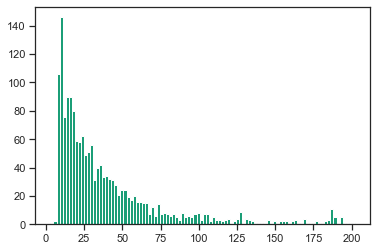

In [ ]:
# histogram of numpoints
plt.hist(numpoints_df['numpoints'], bins=100)

### First filter the tptlabel_dr_df to include only a subset of data of similar timescale

In [66]:
low = 5
high = 60

tptlabel_dr_df_filt = tptlabel_dr_df[tptlabel_dr_df['ntpts'].between(low, high)]

### Verify that the filtered data reflects the total data

In [67]:
factorchoice = 'speed'

In [68]:
# Makes timeplots of the unfiltered and filtered data

f=cp.multi_condition_timeplot(tptlabel_dr_df, factorchoice)
f.show()
f=cp.multi_condition_timeplot(tptlabel_dr_df_filt, factorchoice)
f.show()

KeyError: 'speed'

<Figure size 432x288 with 0 Axes>

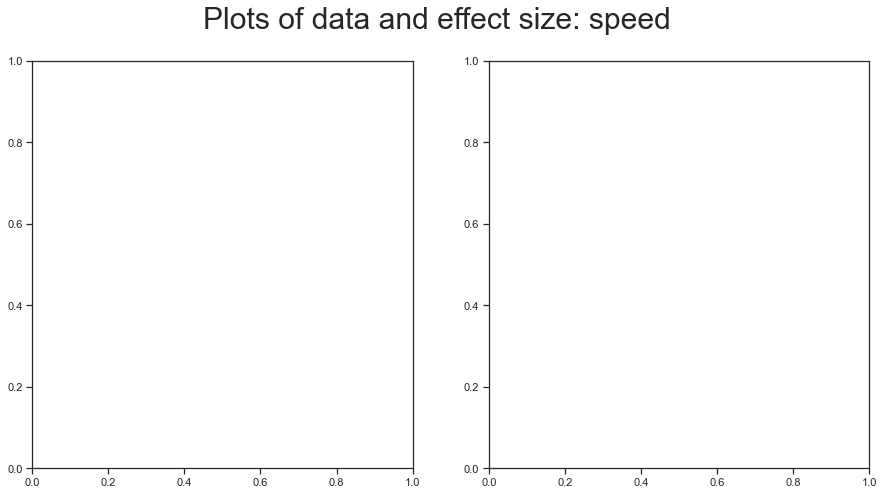

In [69]:
# Plot of difference of the unfiltered and filtered data
f = cp.plots_of_differences_sns(tavg_df, factorchoice)
f.show()

In [70]:
tavg_trajectory_df = cp.time_average(tptlabel_dr_df)
f = cp.plots_of_differences_sns(tavg_trajectory_df, factorchoice)
f.show()

AssertionError: Non-unique values found in column Collection for uniq_id 3_1_1000000022

### Perform Damerau-Levenshtein analysis

In [71]:
df = tptlabel_dr_df_filt
distance_matrix_dameraulev = cp.calculate_edit_distances(df,distancemetric = 'dameraulev', print_interval=10000) #fastdtw # dameraulev # mongeelkan
print(distance_matrix_dameraulev.shape)

  0%|          | 0/1094 [00:00<?, ?it/s]

Using dameraulev distance metric
Pairwise comparison (0, 0):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.0


  1%|          | 10/1094 [00:06<08:35,  2.10it/s]

Pairwise comparison (9, 154):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8]
Sequence 2: [3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3]
Distance: 0.2727272727272727


  2%|▏         | 18/1094 [00:10<08:05,  2.22it/s]

Pairwise comparison (18, 308):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8]
Distance: 0.5333333333333333


  2%|▏         | 27/1094 [00:16<13:15,  1.34it/s]

Pairwise comparison (27, 462):
Sequence 1: [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.9666666666666667


  3%|▎         | 36/1094 [00:22<11:18,  1.56it/s]

Pairwise comparison (36, 616):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8]
Sequence 2: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.5714285714285714


  4%|▍         | 46/1094 [00:26<06:18,  2.77it/s]

Pairwise comparison (45, 770):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.7368421052631579


  5%|▌         | 55/1094 [00:32<13:42,  1.26it/s]

Pairwise comparison (54, 924):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [3, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.5652173913043478


  6%|▌         | 64/1094 [00:36<08:06,  2.12it/s]

Pairwise comparison (63, 1078):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
Distance: 1.0


  7%|▋         | 74/1094 [00:41<06:06,  2.78it/s]

Pairwise comparison (73, 138):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8]
Distance: 0.7692307692307693


  7%|▋         | 82/1094 [00:46<11:05,  1.52it/s]

Pairwise comparison (82, 292):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3]
Sequence 2: [8, 8, 8, 8, 3, 8, 8, 8]
Distance: 0.5625


  8%|▊         | 92/1094 [00:51<07:03,  2.37it/s]

Pairwise comparison (91, 446):
Sequence 1: [8, 8, 8, 6, 6, 3, 3, 3, 3, 3]
Sequence 2: [3, 3, 3, 8, 8, 8, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.8529411764705882


  9%|▉         | 100/1094 [00:55<06:38,  2.50it/s]

Pairwise comparison (100, 600):
Sequence 1: [8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 10%|█         | 110/1094 [00:59<07:42,  2.13it/s]

Pairwise comparison (109, 754):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.6521739130434783


 11%|█         | 118/1094 [01:05<12:42,  1.28it/s]

Pairwise comparison (118, 908):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Sequence 2: [3, 3, 3, 3, 3, 3, 8, 8, 8, 3, 3, 3, 3, 3, 3]
Distance: 0.7818181818181819


 12%|█▏        | 128/1094 [01:12<07:30,  2.14it/s]

Pairwise comparison (127, 1062):
Sequence 1: [3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 13%|█▎        | 147/1094 [01:23<08:58,  1.76it/s]

Pairwise comparison (146, 276):
Sequence 1: [7, 7, 7, 7, 7, 7, 7]
Sequence 2: [8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8]
Distance: 1.0


 14%|█▍        | 155/1094 [01:26<04:46,  3.28it/s]

Pairwise comparison (155, 430):
Sequence 1: [3, 3, 7, 8, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3]
Sequence 2: [3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.7090909090909091


 15%|█▍        | 164/1094 [01:32<12:30,  1.24it/s]

Pairwise comparison (164, 584):
Sequence 1: [3, 3, 3, 3, 3, 3, 7, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 16%|█▌        | 173/1094 [01:37<08:24,  1.83it/s]

Pairwise comparison (173, 738):
Sequence 1: [3, 3, 3, 3, 3, 3, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 1.0


 17%|█▋        | 183/1094 [01:43<08:01,  1.89it/s]

Pairwise comparison (182, 892):
Sequence 1: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 1.0


 18%|█▊        | 192/1094 [01:48<09:15,  1.62it/s]

Pairwise comparison (191, 1046):
Sequence 1: [3, 3, 3, 3, 3, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7]
Sequence 2: [4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4]
Distance: 1.0


 19%|█▉        | 211/1094 [01:56<05:03,  2.91it/s]

Pairwise comparison (210, 260):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3]
Distance: 1.0


 20%|██        | 220/1094 [02:00<04:55,  2.95it/s]

Pairwise comparison (219, 414):
Sequence 1: [3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8]
Sequence 2: [3, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.5454545454545454


 21%|██        | 229/1094 [02:04<05:47,  2.49it/s]

Pairwise comparison (228, 568):
Sequence 1: [3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 22%|██▏       | 238/1094 [02:06<03:39,  3.90it/s]

Pairwise comparison (237, 722):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8]
Sequence 2: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.5263157894736842


 23%|██▎       | 247/1094 [02:10<06:45,  2.09it/s]

Pairwise comparison (246, 876):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3]
Distance: 0.2195121951219512


 23%|██▎       | 256/1094 [02:13<03:43,  3.75it/s]

Pairwise comparison (255, 1030):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 26%|██▌       | 283/1094 [02:25<04:55,  2.74it/s]

Pairwise comparison (283, 398):
Sequence 1: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sequence 2: [3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 3]
Distance: 1.0


 27%|██▋       | 293/1094 [02:28<03:22,  3.95it/s]

Pairwise comparison (292, 552):
Sequence 1: [8, 8, 8, 8, 3, 8, 8, 8]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 28%|██▊       | 302/1094 [02:30<02:55,  4.51it/s]

Pairwise comparison (301, 706):
Sequence 1: [3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.72


 28%|██▊       | 311/1094 [02:35<05:26,  2.40it/s]

Pairwise comparison (310, 860):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 8]
Sequence 2: [3, 3, 3, 3, 3, 8, 8, 8]
Distance: 0.7333333333333333


 29%|██▉       | 321/1094 [02:38<03:19,  3.87it/s]

Pairwise comparison (319, 1014):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 32%|███▏      | 347/1094 [02:50<07:49,  1.59it/s]

Pairwise comparison (347, 382):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.33333333333333326


 33%|███▎      | 356/1094 [02:53<03:47,  3.24it/s]

Pairwise comparison (356, 536):
Sequence 1: [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 33%|███▎      | 365/1094 [02:56<02:54,  4.17it/s]

Pairwise comparison (365, 690):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 3]
Distance: 0.7352941176470589


 34%|███▍      | 375/1094 [03:01<04:50,  2.47it/s]

Pairwise comparison (374, 844):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [7, 7, 7, 7, 7, 7, 7, 7, 7]
Distance: 1.0


 35%|███▌      | 384/1094 [03:05<04:15,  2.78it/s]

Pairwise comparison (383, 998):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8]
Sequence 2: [5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]
Distance: 1.0


 38%|███▊      | 421/1094 [03:24<05:41,  1.97it/s]

Pairwise comparison (420, 520):
Sequence 1: [8, 8, 8, 8, 8, 8, 3, 3]
Sequence 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Distance: 1.0


 39%|███▉      | 429/1094 [03:30<09:57,  1.11it/s]

Pairwise comparison (429, 674):
Sequence 1: [3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3]
Distance: 0.6808510638297872


 40%|████      | 439/1094 [03:35<04:46,  2.29it/s]

Pairwise comparison (438, 828):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Distance: 1.0


 41%|████      | 448/1094 [03:40<04:55,  2.18it/s]

Pairwise comparison (447, 982):
Sequence 1: [8, 8, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Distance: 1.0


 44%|████▍     | 484/1094 [04:03<06:27,  1.58it/s]

Pairwise comparison (484, 504):
Sequence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sequence 2: [5, 5, 5, 1, 1, 5, 5]
Distance: 0.92


 45%|████▌     | 493/1094 [04:08<03:47,  2.65it/s]

Pairwise comparison (493, 658):
Sequence 1: [1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sequence 2: [3, 3, 3, 8, 3, 3, 3, 3, 8]
Distance: 1.0


 46%|████▌     | 502/1094 [04:12<04:04,  2.42it/s]

Pairwise comparison (502, 812):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3]
Sequence 2: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Distance: 1.0


 47%|████▋     | 512/1094 [04:15<02:33,  3.79it/s]

Pairwise comparison (511, 966):
Sequence 1: [8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 3, 3, 3]
Sequence 2: [3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3]
Distance: 0.5882352941176471


 51%|█████     | 557/1094 [04:37<04:53,  1.83it/s]

Pairwise comparison (557, 642):
Sequence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sequence 2: [8, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 1.0


 52%|█████▏    | 566/1094 [04:40<03:31,  2.50it/s]

Pairwise comparison (566, 796):
Sequence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sequence 2: [8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Distance: 1.0


 53%|█████▎    | 576/1094 [04:46<04:27,  1.93it/s]

Pairwise comparison (575, 950):
Sequence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3]
Distance: 1.0


 57%|█████▋    | 622/1094 [05:07<04:02,  1.95it/s]

Pairwise comparison (621, 626):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 3, 3]
Sequence 2: [8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8]
Distance: 0.6428571428571429


 58%|█████▊    | 630/1094 [05:10<03:23,  2.28it/s]

Pairwise comparison (630, 780):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 1.0


 59%|█████▊    | 640/1094 [05:15<03:56,  1.92it/s]

Pairwise comparison (639, 934):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 3, 3, 3, 3, 3]
Sequence 2: [3, 3, 3, 3, 3, 3, 3, 8, 8, 8]
Distance: 0.5652173913043478


 59%|█████▉    | 649/1094 [05:18<03:15,  2.28it/s]

Pairwise comparison (648, 1088):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]
Distance: 1.0


 63%|██████▎   | 694/1094 [05:38<02:46,  2.41it/s]

Pairwise comparison (694, 764):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.5813953488372093


 64%|██████▍   | 704/1094 [05:42<01:16,  5.08it/s]

Pairwise comparison (703, 918):
Sequence 1: [3, 3, 3, 3, 3, 3, 3]
Sequence 2: [8, 8, 8, 8, 3, 3, 3, 3, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Distance: 0.8205128205128205


 65%|██████▌   | 713/1094 [05:45<01:29,  4.24it/s]

Pairwise comparison (712, 1072):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 70%|███████   | 767/1094 [06:06<02:22,  2.29it/s]

Pairwise comparison (767, 902):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 8, 8, 8, 8, 8]
Sequence 2: [3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 0.4444444444444444


 71%|███████   | 777/1094 [06:10<02:10,  2.43it/s]

Pairwise comparison (776, 1056):
Sequence 1: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 76%|███████▌  | 832/1094 [06:27<00:51,  5.04it/s]

Pairwise comparison (831, 886):
Sequence 1: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7, 3, 3, 3, 3, 3, 3]
Sequence 2: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Distance: 1.0


 77%|███████▋  | 842/1094 [06:28<00:40,  6.20it/s]

Pairwise comparison (840, 1040):
Sequence 1: [3, 3, 3, 3, 3, 3, 3, 7]
Sequence 2: [5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


 83%|████████▎ | 905/1094 [06:37<00:25,  7.32it/s]

Pairwise comparison (904, 1024):
Sequence 1: [3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Sequence 2: [5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5]
Distance: 1.0


 89%|████████▉ | 973/1094 [06:44<00:07, 15.25it/s]

Pairwise comparison (968, 1008):
Sequence 1: [8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3]
Sequence 2: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Distance: 1.0


100%|██████████| 1094/1094 [06:50<00:00,  2.67it/s]


(1094, 1094)


In [72]:
# Save the distance matrix
np.save(cp.SAVED_DATA_PATH + 'distance_matrix_dameraulev.npy', distance_matrix_dameraulev)

### Perform a UMAP/HDBSCAN parameter sweep, and select plots

In [ ]:
# '''Sweep'''

# df = tptlabel_dr_df_filt
# for n_neighbors in [8, 10, 12]:
#     for min_samples in [5,8,10, 15, 30, 40]:
#         for min_cluster_size in [5,8,10, 15, 30, 40]:
#             print(f'min_samples = {min_samples}')
#             print(f'min_cluster_size = {min_cluster_size}')
#             print(f'n_neighbors = {n_neighbors}')
#             tptlabel_dr_df_filt_clusteredtrajectories = cp.cluster_sequences(df, distance_matrix_dameraulev,
#              do_umap=True, eps=0.1, min_samples=min_samples, min_cluster_size=min_cluster_size, n_neighbors=n_neighbors)

min_samples = 20
min_cluster_size = 50
n_neighbors = 8
Performing UMAP
Using min_cluster_size = 50 and min_samples = 20
The number of clusters is 6
Silhouette Score: 0.5836164951324463
Adjusted Rand Index: 0.36598514824943057
Adjusted Mutual Information: 0.5691710482066559


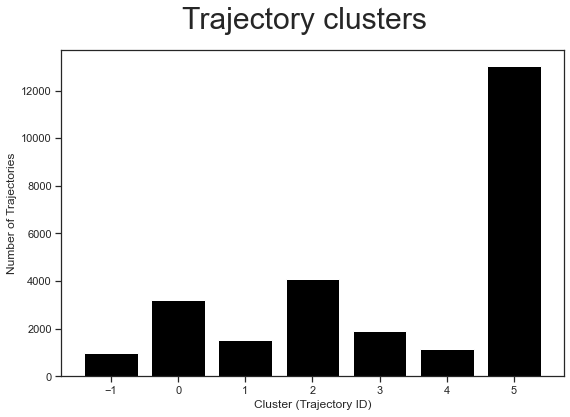

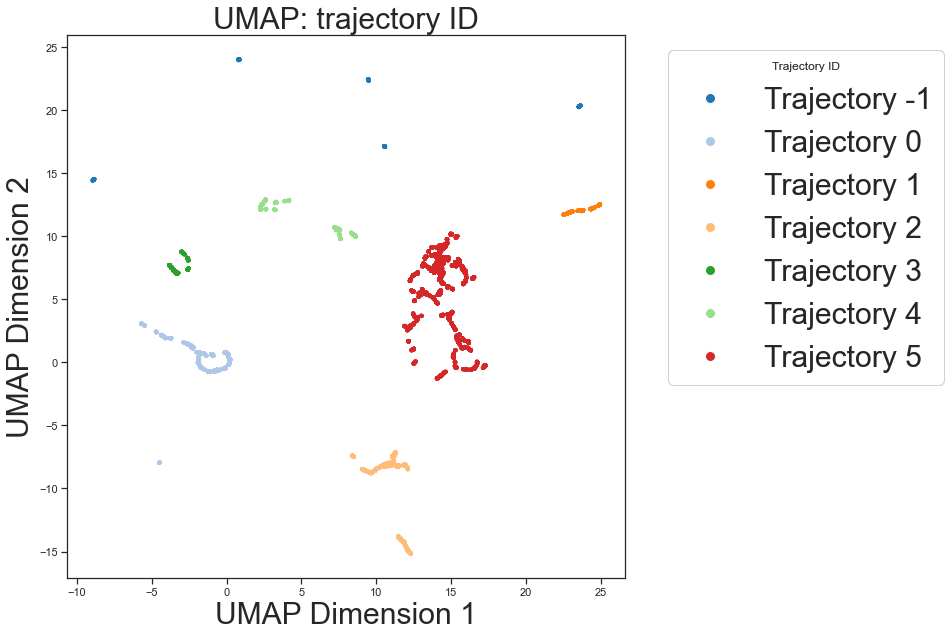

DataFrame with Trajectory IDs:
              uniq_id  frame  label  trajectory_id
460    0_2_1000010198    5.0      8             -1
461    0_2_1000010198    6.0      8             -1
462    0_2_1000010198    7.0      8             -1
463    0_2_1000010198    8.0      8             -1
464    0_2_1000010198    9.0      8             -1
...               ...    ...    ...            ...
47578  8_0_1000001593   42.0      3              5
47579  8_0_1000001593   43.0      3              5
47580  8_0_1000001593   44.0      3              5
47581  8_0_1000001593   45.0      3              5
47582  8_0_1000001593   46.0      7              5

[25898 rows x 4 columns]


In [73]:
'''Chosen UMAP and HDBSCAN parameters'''

min_samples = 20
min_cluster_size = 50
n_neighbors = 8

df = tptlabel_dr_df_filt

print(f'min_samples = {min_samples}')
print(f'min_cluster_size = {min_cluster_size}')
print(f'n_neighbors = {n_neighbors}')
tptlabel_dr_df_filt_clusteredtrajectories = cp.cluster_sequences(df, distance_matrix_dameraulev,
 do_umap=True, eps=0.1, min_samples=min_samples, min_cluster_size=min_cluster_size, n_neighbors=n_neighbors)

In [74]:
# Save clustered trajectories DataFrame to disk as CSV
tptlabel_dr_df_filt_clusteredtrajectories.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories.csv', index=False)

Get the fingerprint plot of trajectories

[0, 1, 2, 3, 4, 5, -1]
[-1, 0, 1, 2, 3, 4, 5]
These are the cluster colors: [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)]


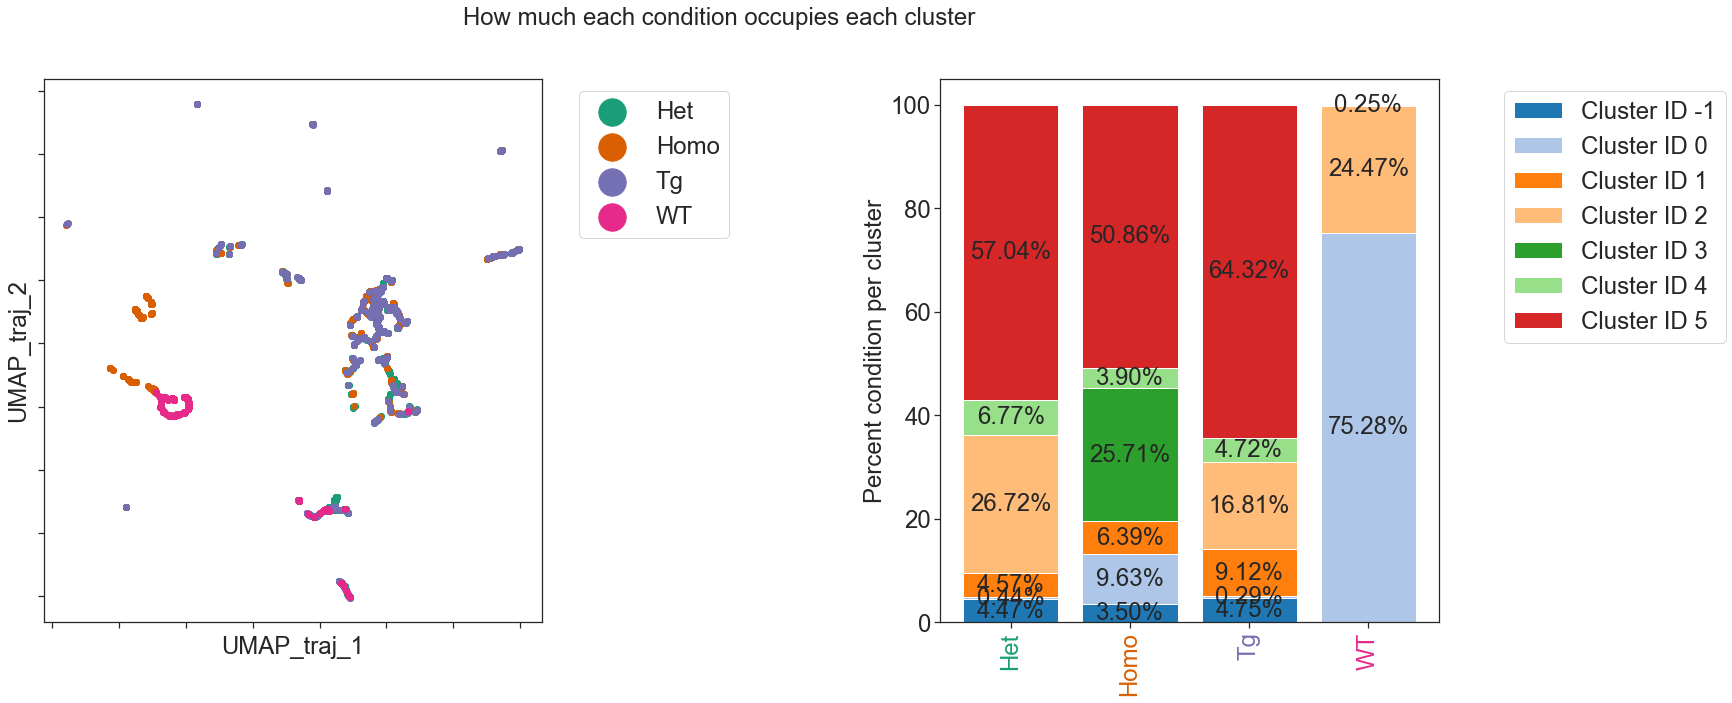

In [75]:
df = tptlabel_dr_df_filt_clusteredtrajectories

cluster_purity_df = cp.purity_pointsinclusterspercondition(df, cluster_label='trajectory_id') 
f = cp.purityplot_percentcluspercondition(df, cluster_purity_df, cluster_label='trajectory_id', dotsize = 30) 

 ### Disambiguate the trajectory clustered cells:
 1) Make an exemplar_df_trajectories containing example rows
 2) Get the full tracks from those rows and make exemplar_df_trajectories_fulltrack
 2) Disambiguate with exemplar_df_trajectories
 3) Plot multiples with exemplar_df_trajectories_fulltrack

In [76]:
df = tptlabel_dr_df_filt_clusteredtrajectories
exemplar_df_trajectories, exemplar_df_trajectories_fulltrack  = cp.make_exemplar_df_basedon_trajectories(df, cells_per_traj=6)

In [77]:
# full_tracks_df = pd.read_csv(cp.SAVED_DATA_PATH + 'full_tracks_df.csv')
FONT_SIZE = 10
df = exemplar_df_trajectories_fulltrack
cp.plot_trajectories(df=exemplar_df_trajectories_fulltrack, global_y=True, global_x=True)

NameError: name 'FONT_SIZE' is not defined

Factors to be scaled using log2 and then minmax:
Factor: euclidean_dist will be transformed
Factor: segment_length will be transformed
Factor: cumulative_length will be transformed
Factor: speed will be transformed
Factor: orientedness will be transformed
Factor: endpoint_dir_ratio will be transformed
Factor: dir_autocorr will not be transformed
Factor: outreach_ratio will be transformed
Factor: MSD will be transformed
Factor: max_dist will be transformed
Factor: arrest_coefficient will not be transformed
Factor: Sphericity will be transformed
Factors TO transform (log2+minmax): 10
  ['euclidean_dist', 'segment_length', 'cumulative_length', 'speed', 'orientedness', 'endpoint_dir_ratio', 'outreach_ratio', 'MSD', 'max_dist', 'Sphericity']
Factors NOT to transform (minmax only): 2
  ['dir_autocorr', 'arrest_coefficient']


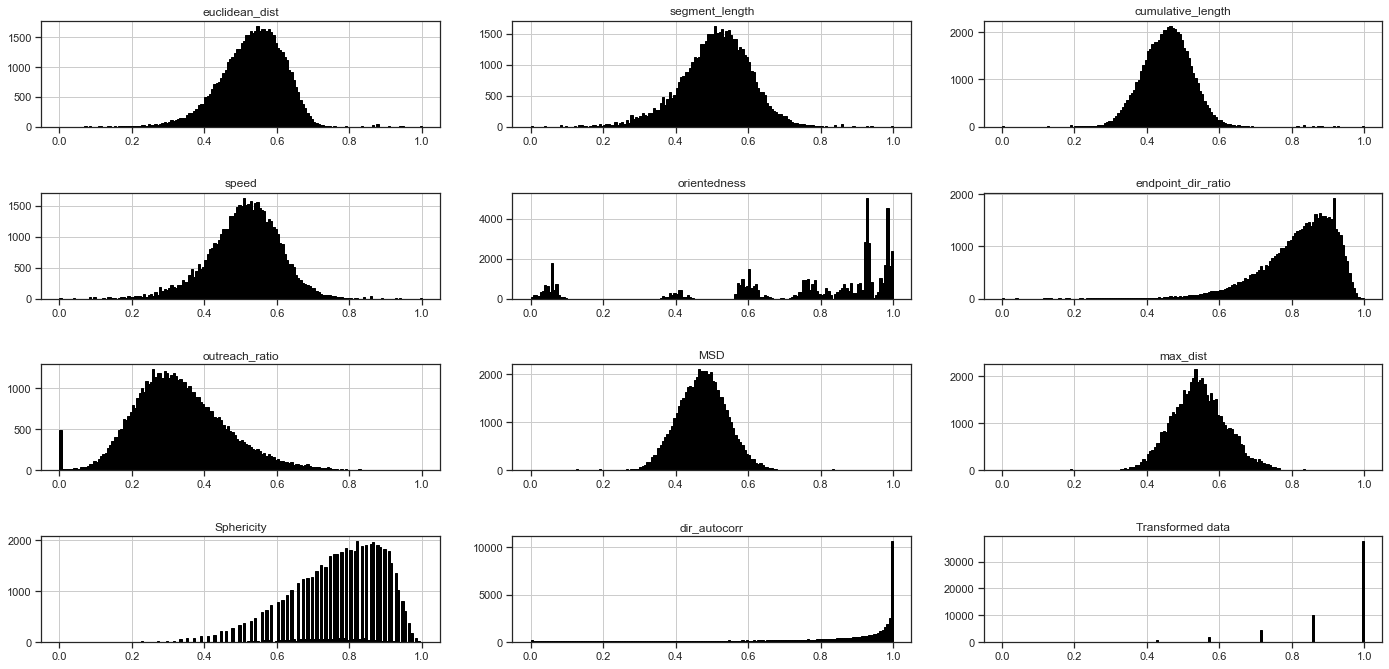

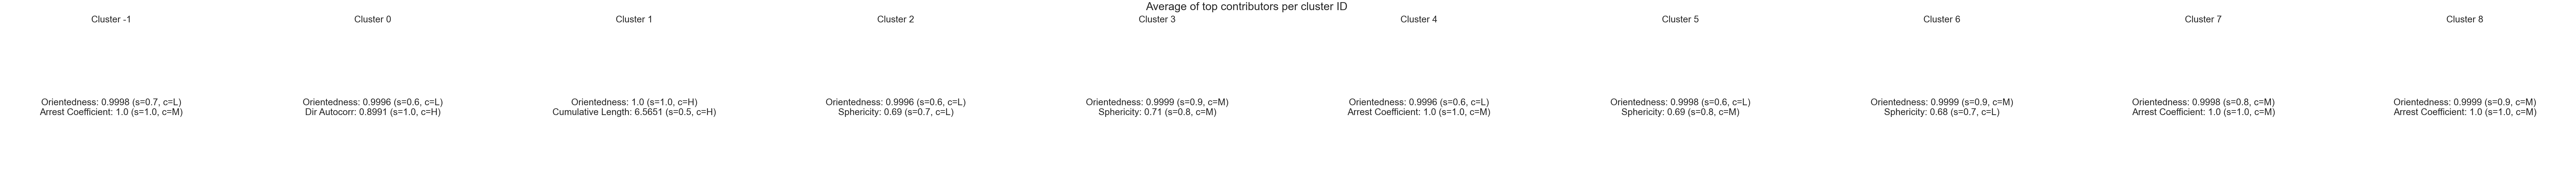

Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=0.07, angle=0)


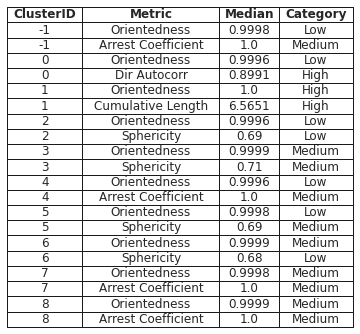

In [79]:
size=300 #


df= tptlabel_dr_df_filt_clusteredtrajectories 
exemp_df=exemplar_df_trajectories 

top_dictionary, contributions_df_singletpoints, scaled_df=cp.contribution_to_clusters(df_in=tptlabel_dr_df,  howmanyfactors=2, dr_factors= chosenfactors) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.plot_cluster_averages(top_dictionary, df, scaled_df)
result_df = cp.create_cluster_averages_table(top_dictionary, df, scaled_df)
# same as before - this can't be run (below, commented out) without the contours (segmentations), which you don't have here
# cp.disambiguate_timepoint(df, exemp_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True, trajectory = True) 

# Percent fingerprint plot for cluster IDs per TRAJECTORY

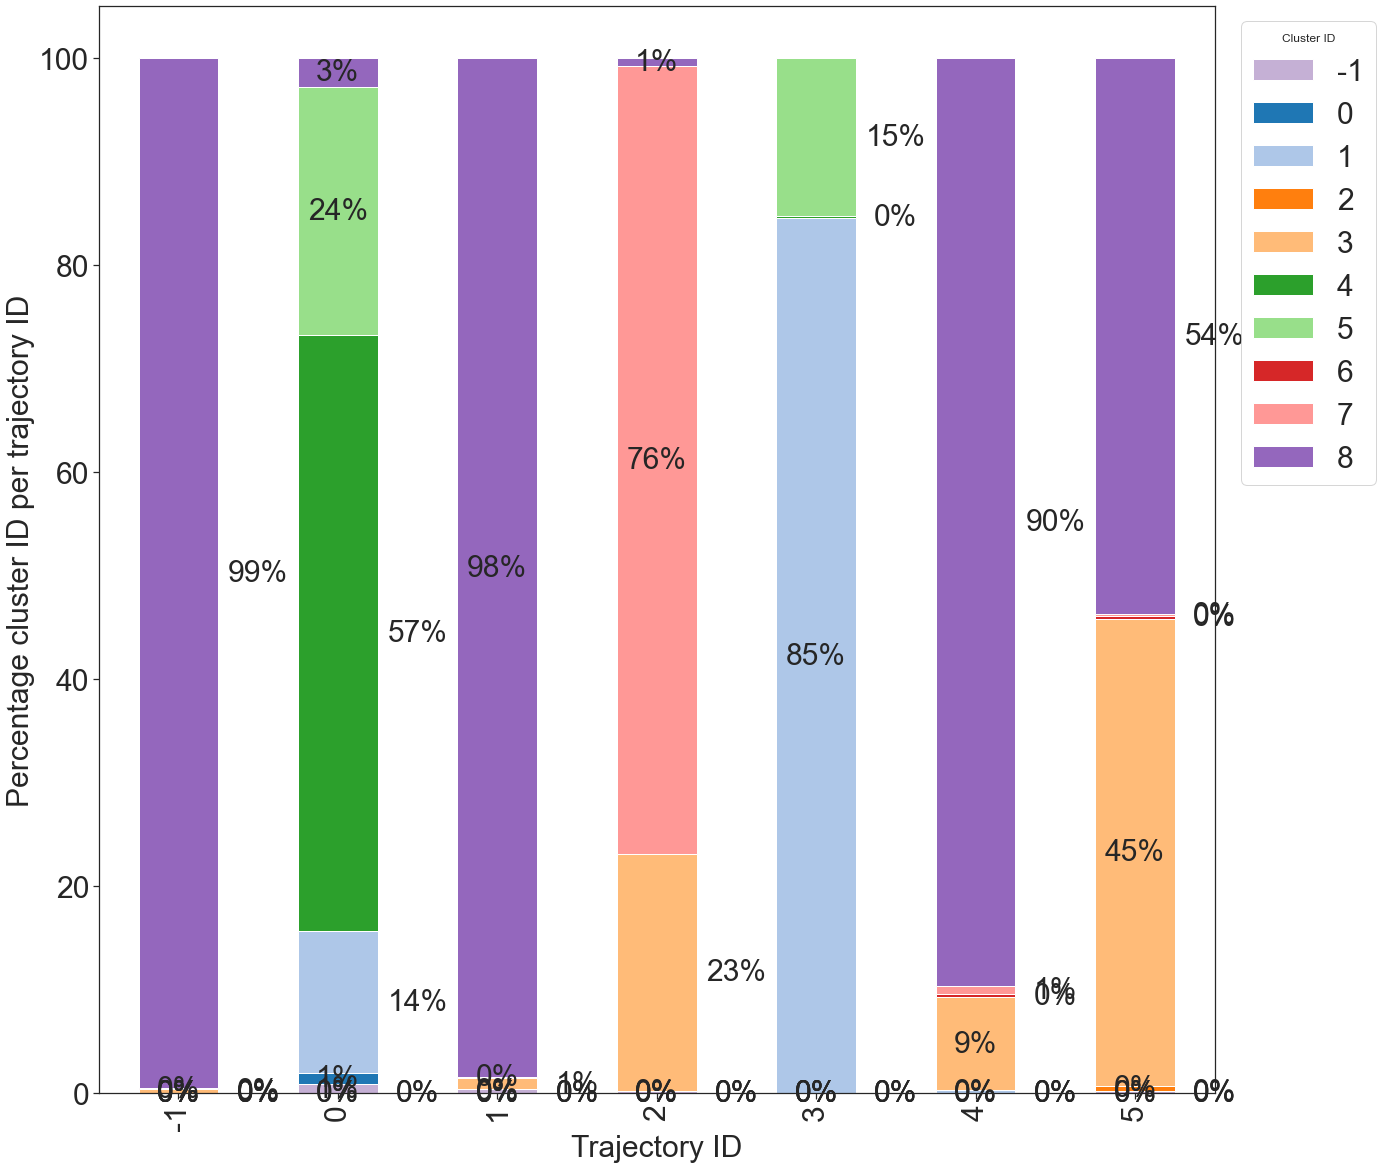

In [80]:
# tptlabel_dr_df_filt_clusteredtrajectories = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories_FINAL_10-12-2023.csv')

df = tptlabel_dr_df_filt_clusteredtrajectories
cp.fingerprintplot_clusters_per_trajectory(df)

# Plasticity of cells per trajectory

In [ ]:
tptlabel_dr_df_filt_clusteredtrajectories = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Z:/mshannon/2025/August/EDELBLUM/Ananya_data_output\\EDELBLUM_1\\saved_data/tptlabel_dr_df_filt_clusteredtrajectories_FINAL_10-17-2023.csv'

trajectory_id         uniq_id  cum_n_changes
0                -1  0_2_1000010198              0
1                -1  0_2_1000010199              0
2                -1  0_2_1000010763              0
3                -1  0_2_1000012324              0
4                -1  0_2_1000013673              0
...             ...             ...            ...
1089              5  7_3_1000022574              1
1090              5  7_3_1000022609              2
1091              5  7_3_1000022622              3
1092              5  7_3_1000022771              1
1093              5  8_0_1000001593              1

[1094 rows x 3 columns]

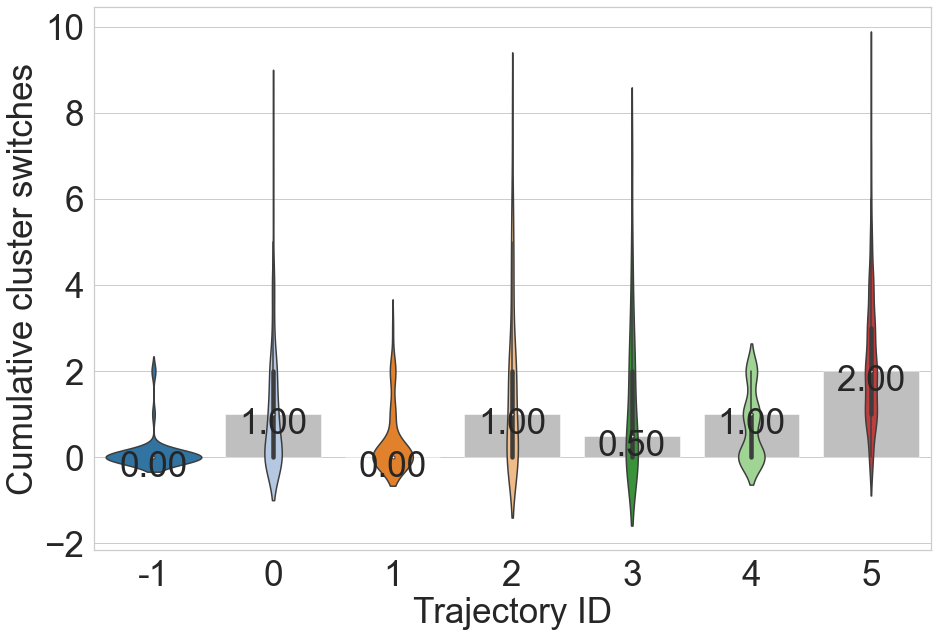

In [82]:
df=tptlabel_dr_df_filt_clusteredtrajectories
cp.plasticity_per_trajectory(df)

Time window mins:  5.3


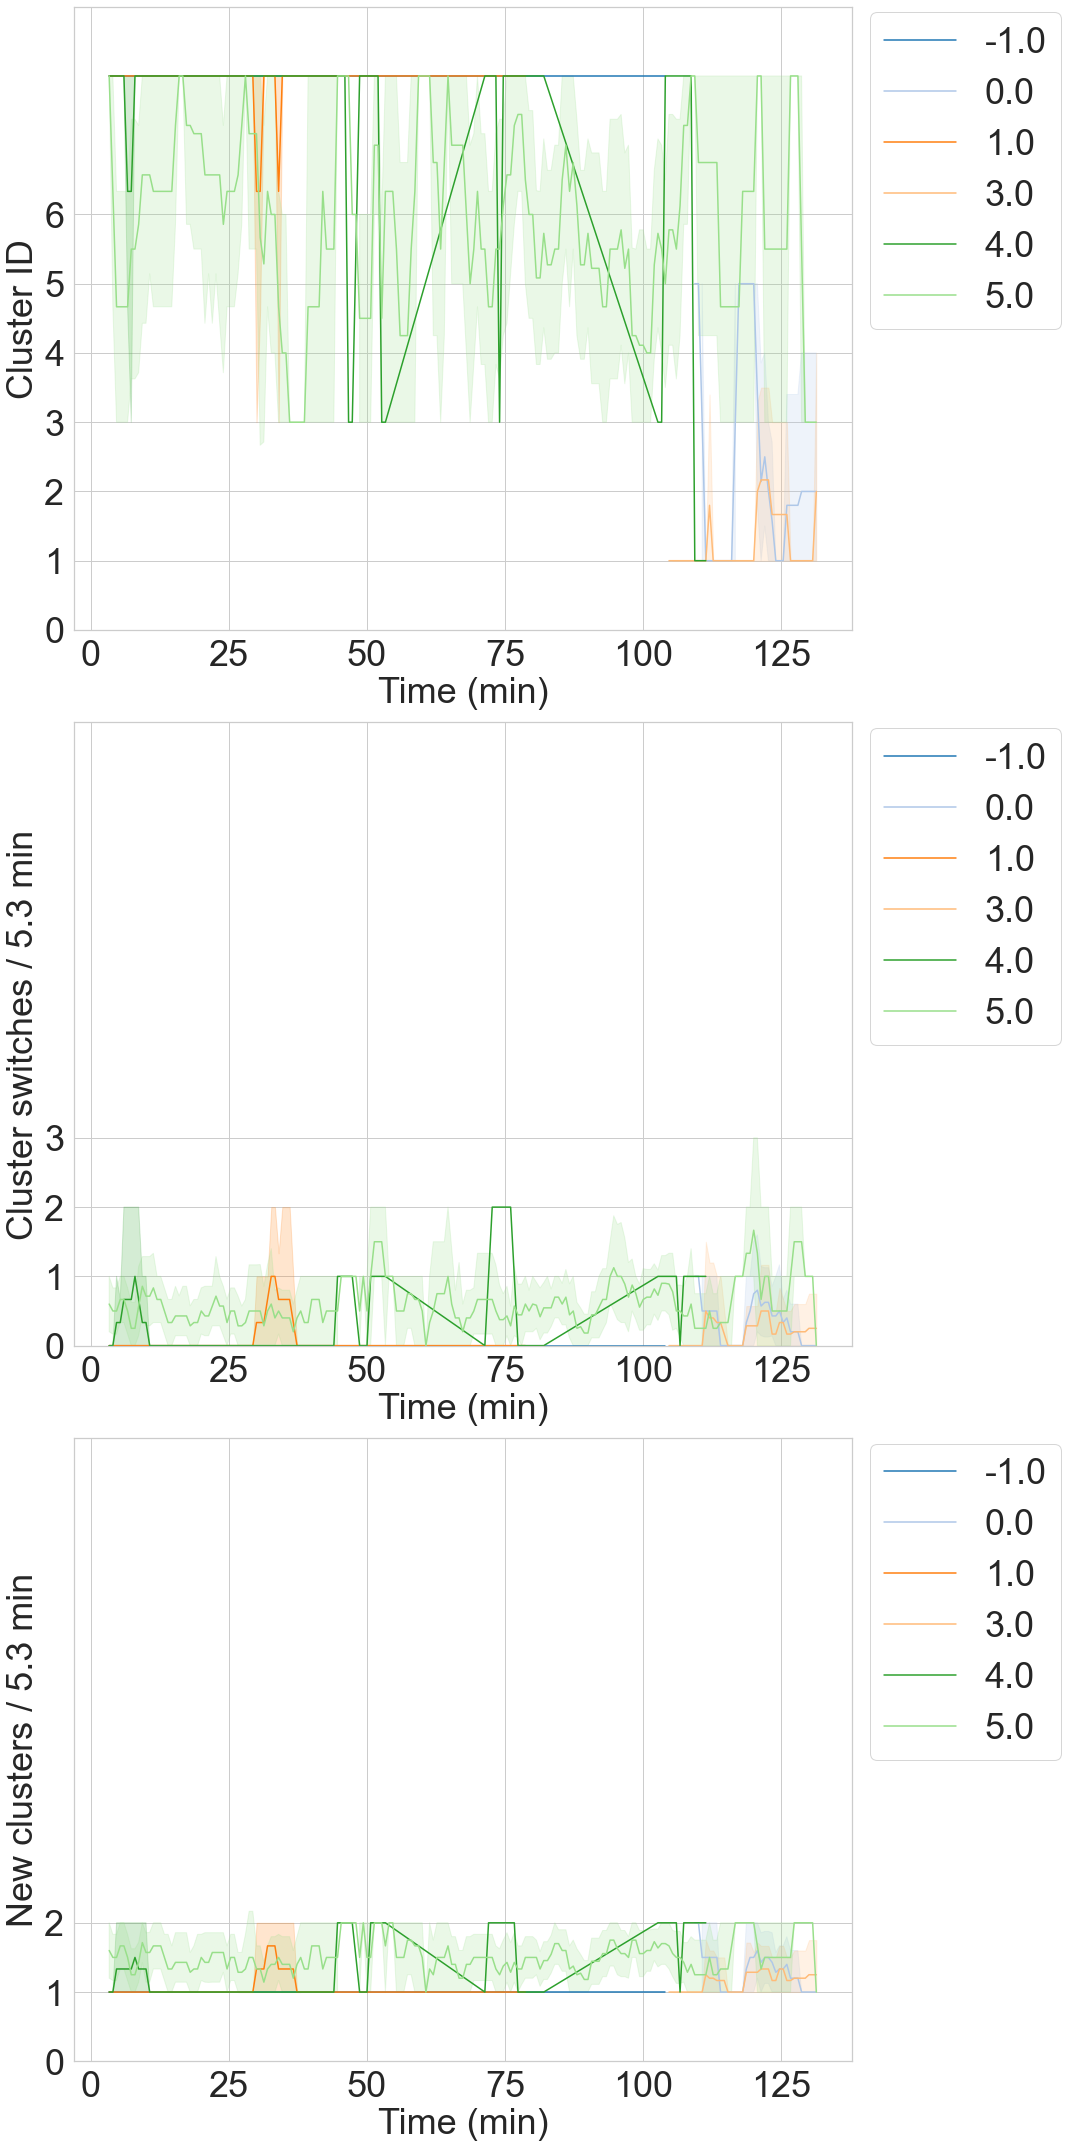

In [83]:
df=tptlabel_dr_df_filt_clusteredtrajectories
# all='\_allcells'
cp.plot_plasticity_changes_trajectories(df, identifier='\_allcells', maxy=9 , t_window_multiplier = 1) #problem with NaNs in the data

# Animations of trajectories

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
cp.make_trajectory_animations(df, exemplar_df_trajectories, number_of_trajectories=2, colormode='cluster') # singlecluster, cluster, trajectory

Select a number of example cells from each trajectory ID to map back on to the data and display as stacks of PNGs

In [ ]:
number_of_trajectories = 10 # Select a number of trajectories to plot

df = tptlabel_dr_df_filt_clusteredtrajectories

trajectory_ids = df['trajectory_id'].unique()

uniq_id_choices_list = []

for trajectory_id_choice in trajectory_ids:
    # for each trajectory_id, get a list of possible uniq_ids from the df
    uniq_id_choices = tptlabel_dr_df_filt_clusteredtrajectories[tptlabel_dr_df_filt_clusteredtrajectories['trajectory_id']==trajectory_id_choice]['uniq_id'].values
    # Make sure each once is unique in that list
    uniq_id_choices = np.unique(uniq_id_choices)
    # choose a number of random uniq_ids from that list based on number_of_trajectories
    uniq_id_choices = np.random.choice(uniq_id_choices, number_of_trajectories)
    # append each choice to a list
    uniq_id_choices_list.append(uniq_id_choices)
# flatten the list
chosen_uniq_ids = [item for sublist in uniq_id_choices_list for item in sublist]
    
print(chosen_uniq_ids)

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
cp.make_png_behaviour_trajectories(df,chosen_uniq_ids,XYRange = 300, follow_cell = False, invert=False)

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
cp.make_raw_cell_pngstacks(df,chosen_uniq_ids,XYRange = 220, follow_cell=False, invert=False)